# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(airbnbDataSet_filename)
df2 = pd.read_csv(adultDataSet_filename)
df3 = pd.read_csv(WHRDataSet_filename )
df4 = pd.read_csv(bookReviewDataSet_filename)

df.head() # I chose the airbnb dataset


,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,Jennifer,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,0.80,0.17,True,8.0,...,4.79,4.86,4.41,False,3,3,0,0,0.33,9
1,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,LisaRoxanne,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,0.09,0.69,True,1.0,...,4.80,4.71,4.64,False,1,1,0,0,4.86,6
2,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,Rebecca,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",1.00,0.25,True,1.0,...,5.00,4.50,5.00,False,1,1,0,0,0.02,3
3,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",Shunichi,"New York, New York, United States",I used to work for a financial industry but no...,1.00,1.00,True,1.0,...,4.42,4.87,4.36,False,1,0,1,0,3.68,4
4,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,MaryEllen,"New York, New York, United States",Welcome to family life with my oldest two away...,NaN,NaN,True,1.0,...,4.95,4.94,4.92,False,1,0,1,0,0.87,7


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

--------------------------------------------------------------------------------------
1. I chose the Airbnb dataset since I thought it would have a lot of real applications (all the datasets do, but I thought it might be interesting to work with the different features)

2. I will be predicting the price of the Airbnb as the label.

3. This is primarily a supervised learning problem (since I am using training examples with corresponding values for the y_train, in order to learn the model to predict the right price of an Airbnb), and is also a regression problem. It's regression as I'm predicting a continuous value (price)

4. I did a bunch of in depth feature and data analysis, so the list of features definitely changed, but some of the features I can recall are if it's an entire home or apartment, if there are beds, or bathrooms, what the reviews of the location are, etc.) There were also some other interesting features that came up, but I go more in depth to that when I actually discuss the feature exploration in the code below.

5. This problem is very important and relevant because accurate price prediction is crucial for both Airbnb hosts and the company itself. For hosts, knowing the optimal price for their listing can maximize their revenue while ensuring that their property remains competitive in the market. By setting the right price, hosts can balance  attracting guests as well as earning the most profit. So essentially, it might be a very crucial label to predict in business situations. 

----------------------------------------------------------------------------------------

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

---------------------------------------------------------------------------------------
1. In the code below, I address a good majority of the suggestions listed here. I do address NaN and missing values (constantly), I winsorize the numerical features and try to scale the data, I fixed the boolean data, and then I handled the string features in a variety of ways: one-hot-encoding, frequency encoding, MultiLabelBinarizer, and NLP techniques (such as TFIDF, word embeddings, and sentiment intensity analysis). Of course, I also preprocessed the text appropriately when it came to feeding them to the NLP models. In the end, I made sure to go through and try to select the most important features out of all the features I created, and tried to apply a variety of feature engineering techniques

2. I believe the model I want to use the most for this regression task is the Random Forest ensemble model (specifically, a RandomForestRegressor model in this case). Essentially, a random forest is an ensemble modeling technique that is used for both regression and classification tasks, and it operates on a collection of decision trees (this will be the n_estimators parameter). It uses a technique called bagging (or bootstrap aggregating) which involves creating numerous subsets of the data by random sampling with replacement. Then, each of these subsets is used to train a decision tree. In addition, a random portion of the features are selected to train each tree as well. Eventually all these trees are collected, and for a classification problem, the majority vote is selected, whereas for a regression problem (like mine), an average is taken.

3. As for the metrics: for a regression problem, the main ones (I think) are root mean squared error as the loss function to optimize, and R^2 value. The root mean squared error takes the average of the squared differences between predicted and actual values, and then roots it. As for the R^2 (also called correlation coefficient in statistics I think), it's an indicator of how well the model is performing and how well the regression model fits the data. Typically, you would like the RMSE to be as low as possible, and for the R^2 value to be higher. 

----------------------------------------------------------------------------------------
### Data Prep:
<br>

Below, I proceed to do all the data prep necessary for this dataset, from inspecting the data, replacing missing values, scaling the numeric columns and removing outliers, and also trying to deal with the string object columns in a meaningful way. In the end, I plan to try to do a feature analysis and drop features that might not contribute (so the model doesn't overfit)

In [3]:
# packages I need for data cleaning: 
from scipy.stats import mstats # for winsorization of data
from sklearn.preprocessing import MinMaxScaler, StandardScaler # scaling the numerical data
import gensim # for cleaning/handling text 
import nltk
from nltk.corpus import stopwords # getting stopwords from natural lang. toolkit
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re # regex stuff to get rid of HTML in preprocessing
from joblib import Parallel, delayed # for parallel processing
import multiprocessing # for parallel processing
from sklearn.feature_extraction.text import TfidfVectorizer # for tfidf 
from gensim.models import Word2Vec # for word embeddings
from nltk.sentiment.vader import SentimentIntensityAnalyzer # for sentimentality analysis
from sklearn.preprocessing import MultiLabelBinarizer # for encoding the amenities

### importing these to test feature importance: 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [4]:
df.head() # taking a quick look at the airbnb dataset again

,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,Jennifer,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,0.80,0.17,True,8.0,...,4.79,4.86,4.41,False,3,3,0,0,0.33,9
1,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,LisaRoxanne,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,0.09,0.69,True,1.0,...,4.80,4.71,4.64,False,1,1,0,0,4.86,6
2,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,Rebecca,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",1.00,0.25,True,1.0,...,5.00,4.50,5.00,False,1,1,0,0,0.02,3
3,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",Shunichi,"New York, New York, United States",I used to work for a financial industry but no...,1.00,1.00,True,1.0,...,4.42,4.87,4.36,False,1,0,1,0,3.68,4
4,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,MaryEllen,"New York, New York, United States",Welcome to family life with my oldest two away...,NaN,NaN,True,1.0,...,4.95,4.94,4.92,False,1,0,1,0,0.87,7


<br>

#### Inspecting Columns, Features and Label

First thing I want to do is take a look at what all the current columns (aka features + label) are, and what they contain. Since there's so many, Jupyter Notebooks isn't really showing it all to me, thus I try to loop through some of the initial examples and what they contain via the below code:

In [5]:
print(df.columns, "\n")

for i in range (0, 2):
    print("example ", i+1, ": \n")
    for j in range(0, 50):
        print(df.columns[j],": ", df.iloc[i,j], "\n")
    print("\n")

print("\nDescription of Data:\n")

print(df.describe())

Index(['name', 'description', 'neighborhood_overview', 'host_name',
       'host_location', 'host_about', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_group_cleansed', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',

<br>

#### Brief Look at Missing Values

Before I do anything, I also just quickly wanted to inspect the data to see what's missing, what types the missing values are, etc., so I can start to get an idea of what to do with them

In [6]:
print("shape: ", df.shape, '\n') # to see what the general shape of the data is 

# now to check for the missing values: 
nan_count = np.sum(df.isnull(), axis = 0)

condition = nan_count != 0 # looking for all columns with missing values

col_names = nan_count[condition].index # index gets the column names
nan_cols = list(col_names) # converting column names to list to view them better
print("missing value columns: ", nan_cols, "\n") 

nan_col_types = df[nan_cols].dtypes # also printing the datatypes of the missing vals
print(nan_col_types)

nan_count # just to look at the overall count

shape:  (28022, 50) 

missing value columns:  ['name', 'description', 'neighborhood_overview', 'host_location', 'host_about', 'host_response_rate', 'host_acceptance_rate', 'bedrooms', 'beds'] 

name                      object
description               object
neighborhood_overview     object
host_location             object
host_about                object
host_response_rate       float64
host_acceptance_rate     float64
bedrooms                 float64
beds                     float64
dtype: object


name                                                5
description                                       570
neighborhood_overview                            9816
host_name                                           0
host_location                                      60
host_about                                      10945
host_response_rate                              11843
host_acceptance_rate                            11113
host_is_superhost                                   0
host_listings_count                                 0
host_total_listings_count                           0
host_has_profile_pic                                0
host_identity_verified                              0
neighbourhood_group_cleansed                        0
room_type                                           0
accommodates                                        0
bathrooms                                           0
bedrooms                                         2918
beds                        

<br>

### Dealing with Numeric Features and Boolean Features

Now that I got a very high level overview of what might need to be processed and fixed, I think I will start with the easiest to fix... which are the numeric columns. We have explicitly been given examples and direction on how to deal with missing values for numeric columns/features, and thus this is kind of where I want to start with my data cleaning. In addition, I also want to fix the boolean columns/features, as I notice they are currently strings and should probably be converted to integers for the model to get the most value out of them

#### Getting Rid of NaN values (for numeric features)

##### Getting Numeric NaN Columns 
In the following bit of code, I select all the numeric types using the select_dtypes function for dataframes. Then, I use np.number to help select all number related features (float, int, etc). Then once I get the columns and then transform them to a list, I'll have a list of all the numeric columns. 

I then get the NaN count for ALL the numeric columns via going down each column and summimg up the things that evaluate to isnull() being true (as done in the previous example above). Then I make the condition from this that num_nan_count != 0, in order to find the columns where there IS NaN count (and thus there are missing values). I take the columns that satisfy this, get their index (aka the feature/column name) and then turn it into a list via tolist() function. Finally, I print out all the number columns that do have missing values (that I'll deal with subsequently).

In [7]:
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()

# ^ first, I'll select all the numeric types using the select_dtypes function for df
# np.number helps in selecting all number related features (float, int, etc)
# finally, get the columns and then transform them to a list

num_nan_count = np.sum(df[numeric_columns].isnull(), axis = 0) # NaN count for numbers
print(num_nan_count, '\n') # printing all the NaN values for things in the numeric columns

num_condition = num_nan_count != 0  # again, this is condition to find NaN column 

num_col_names = num_nan_count[num_condition].index.tolist() 
# ^ this gets column names and formats them to a list 

print(num_col_names) # looking SPECIFICALLY at the numerical columns with NaN present

host_response_rate                              11843
host_acceptance_rate                            11113
host_listings_count                                 0
host_total_listings_count                           0
accommodates                                        0
bathrooms                                           0
bedrooms                                         2918
beds                                             1354
price                                               0
minimum_nights                                      0
maximum_nights                                      0
minimum_minimum_nights                              0
maximum_minimum_nights                              0
minimum_maximum_nights                              0
maximum_maximum_nights                              0
minimum_nights_avg_ntm                              0
maximum_nights_avg_ntm                              0
availability_30                                     0
availability_60             

<br>

##### Replacing NaN with Mean:

In the code that follows, I then replace all the numeric NaN missing values with the mean of the entire numeric column (as we have been shown to do before). Then I just print out the num_nan_count again to verify that there are no longer missing values for the numeric columns.

In [8]:
# getting rid of nan values: 
for col in numeric_columns:
    df[col].fillna(df[col].mean(), inplace=True) # replacing with mean 
    
num_nan_count = np.sum(df[numeric_columns].isnull(), axis = 0)
num_nan_count # checking if there is no longer any missing values

host_response_rate                              0
host_acceptance_rate                            0
host_listings_count                             0
host_total_listings_count                       0
accommodates                                    0
bathrooms                                       0
bedrooms                                        0
beds                                            0
price                                           0
minimum_nights                                  0
maximum_nights                                  0
minimum_minimum_nights                          0
maximum_minimum_nights                          0
minimum_maximum_nights                          0
maximum_maximum_nights                          0
minimum_nights_avg_ntm                          0
maximum_nights_avg_ntm                          0
availability_30                                 0
availability_60                                 0
availability_90                                 0


<br>

#### Removing Outliers and Fixing Distribution/Scaling Dataset

Now I'll proceed to take a look at the distribution of the numerical data and if there's anything I can do to fix the outliers (I might do winsorization) and scaling the data (depending on how the data looks, I plan to do MinMax or maybe Standard scaling, or even maybe log transformations)


##### Taking a Look at Data Distribution

First, I'll look how the numeric data values are distributed by using the .describe() as well as trying to plot the distributions 

In [9]:
df[numeric_columns].describe()

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
count,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,...,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000
mean,0.906901,0.791953,14.554778,14.554778,2.874491,1.142174,1.329708,1.629556,154.228749,18.689387,...,4.814300,4.808041,4.750393,4.647670,9.581900,5.562986,3.902077,0.048283,1.758325,5.169510
std,0.172697,0.214963,120.721287,120.721287,1.860251,0.421132,0.663238,1.070269,140.816605,25.569151,...,0.438603,0.464585,0.415717,0.518023,32.227523,26.121426,17.972386,0.442459,4.446143,2.028497
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,29.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000,1.000000
25%,0.906901,0.791953,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,70.000000,2.000000,...,4.810000,4.810000,4.670000,4.550000,1.000000,0.000000,0.000000,0.000000,0.130000,4.000000
50%,0.906901,0.791953,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,115.000000,30.000000,...,4.960000,4.970000,4.880000,4.780000,1.000000,1.000000,0.000000,0.000000,0.510000,5.000000
75%,1.000000,0.950000,3.000000,3.000000,4.000000,1.000000,1.329708,2.000000,180.000000,30.000000,...,5.000000,5.000000,5.000000,5.000000,3.000000,1.000000,1.000000,0.000000,1.830000,7.000000
max,1.000000,1.000000,3387.000000,3387.000000,16.000000,8.000000,12.000000,21.000000,1000.000000,1250.000000,...,5.000000,5.000000,5.000000,5.000000,421.000000,308.000000,359.000000,8.000000,141.000000,13.000000


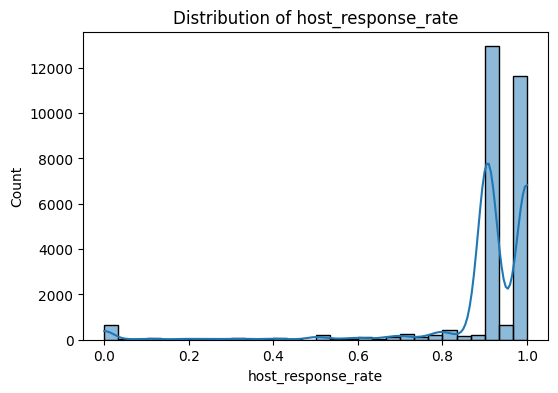

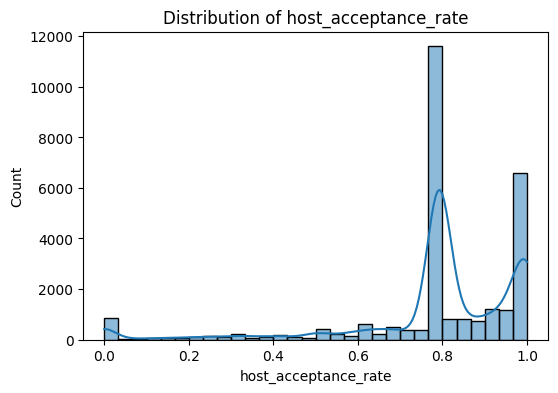

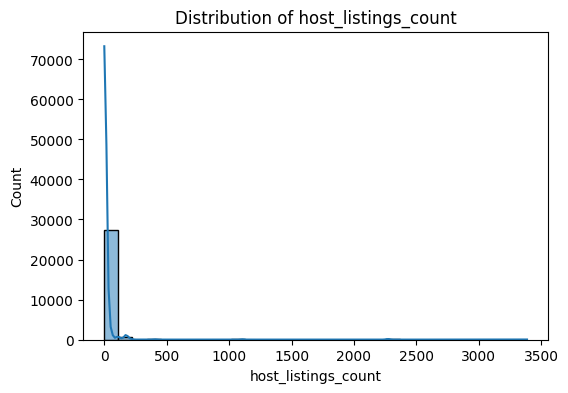

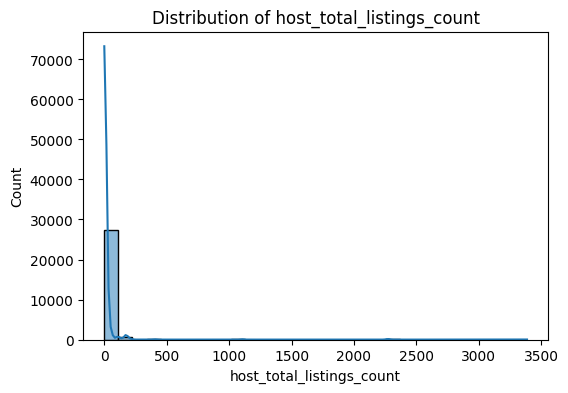

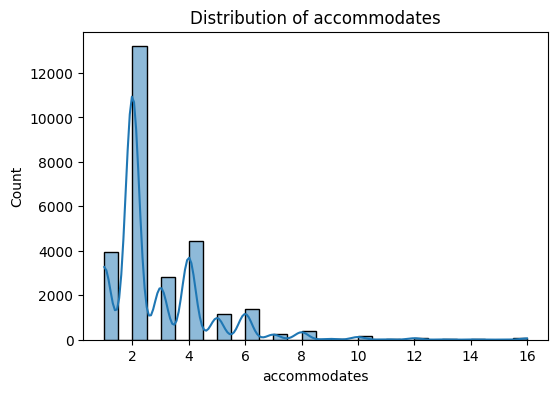

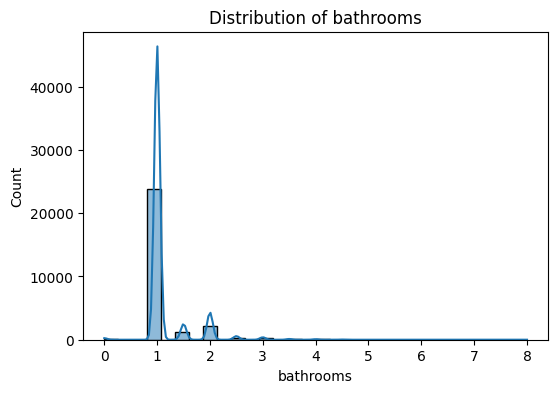

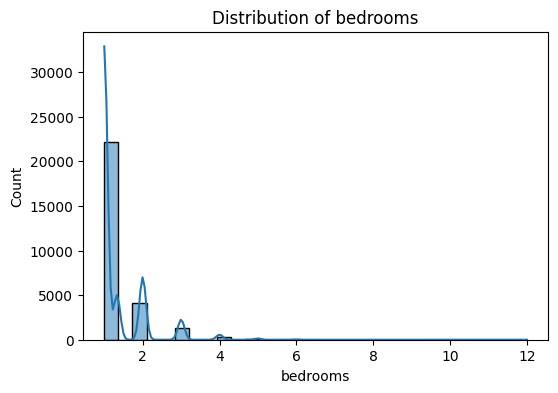

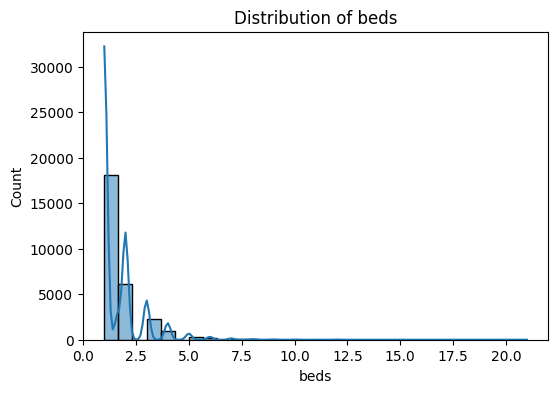

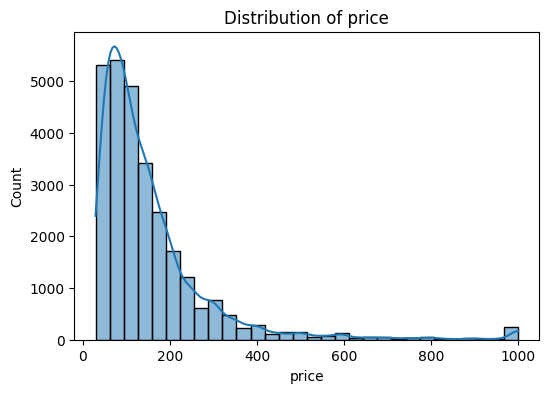

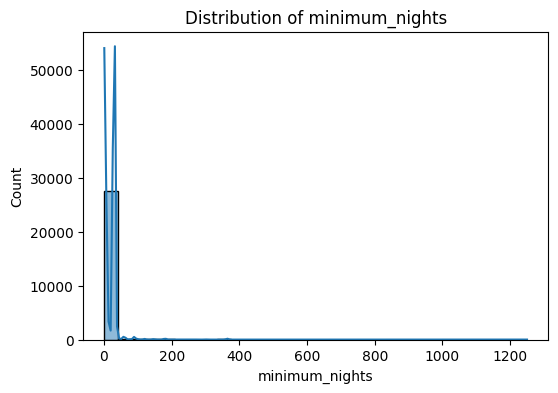

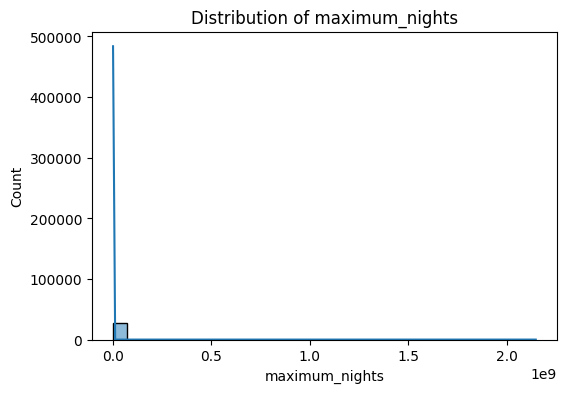

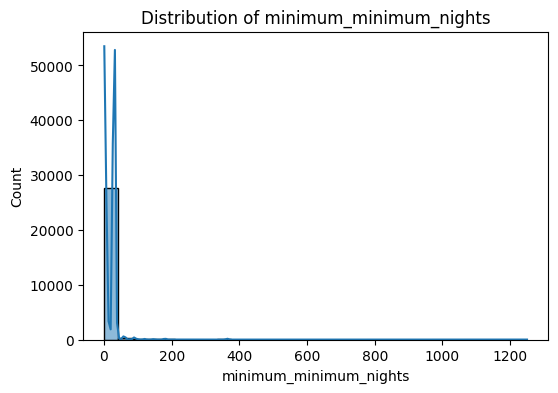

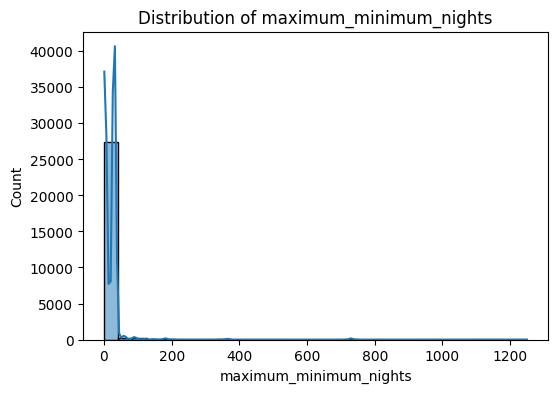

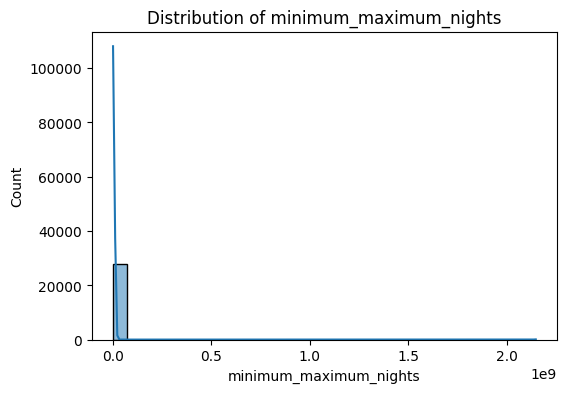

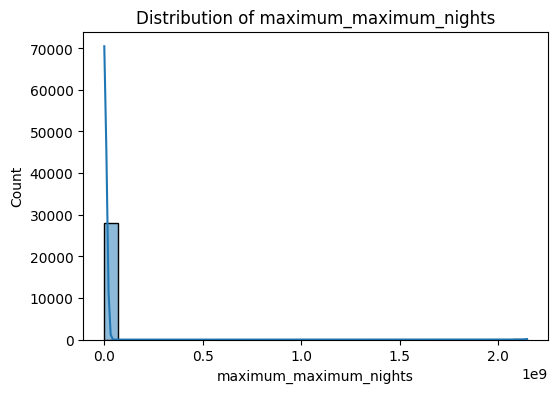

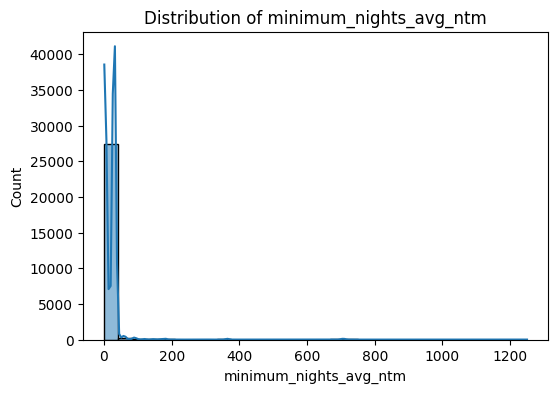

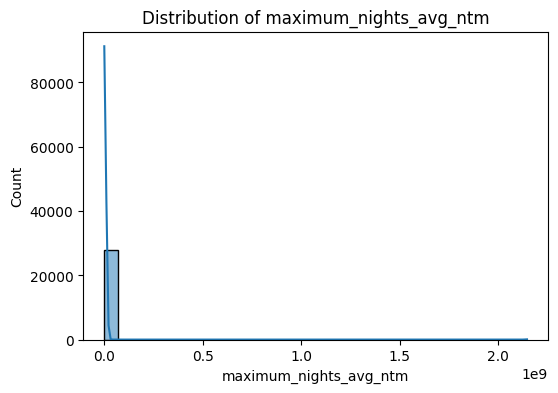

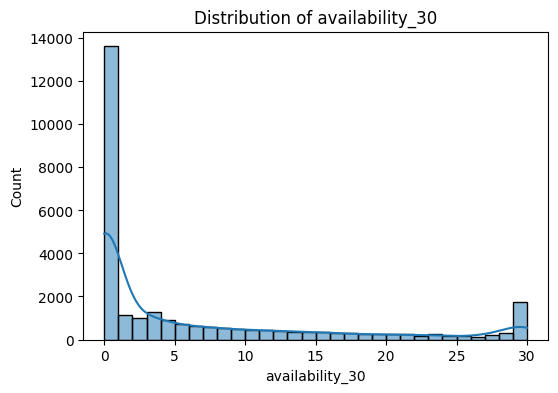

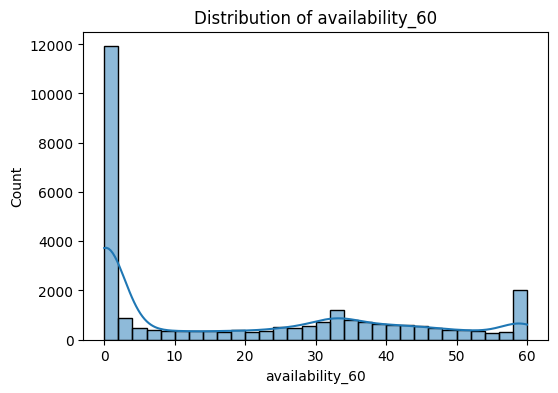

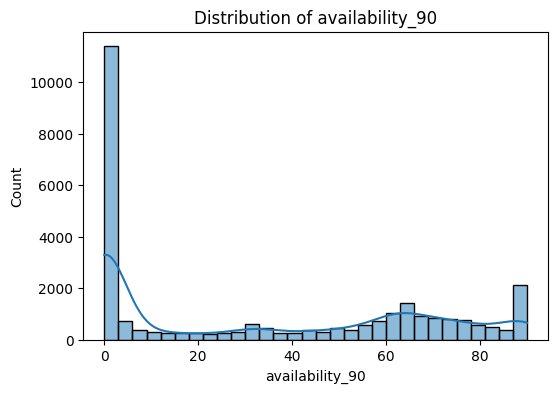

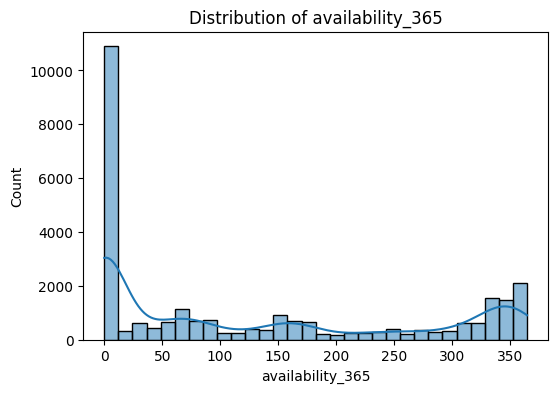

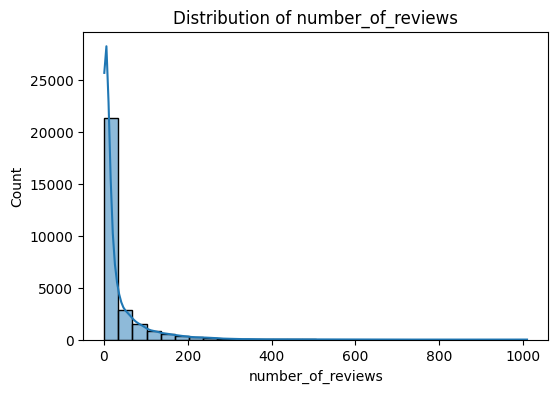

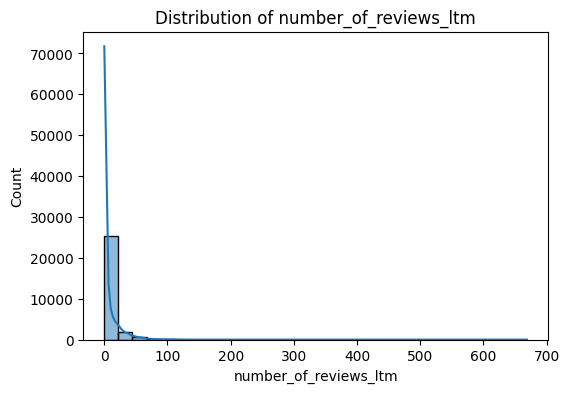

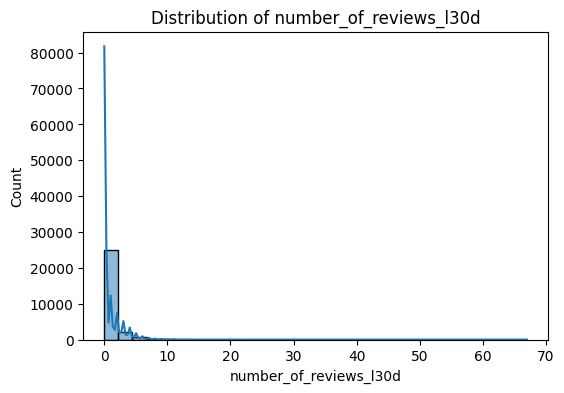

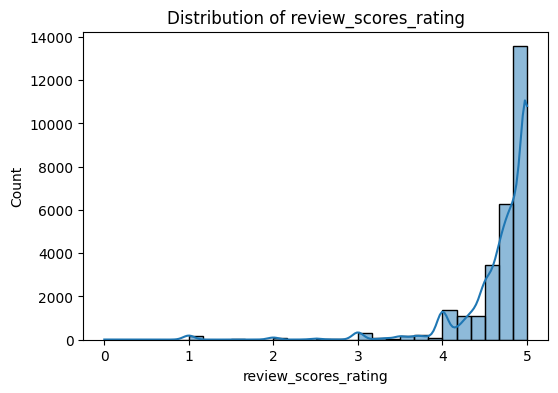

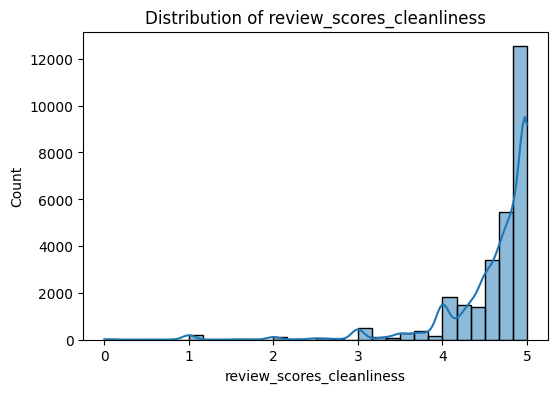

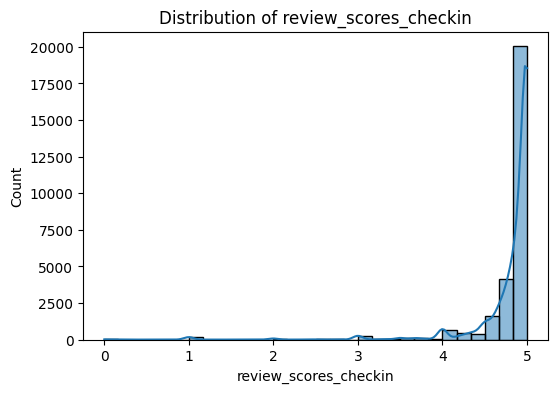

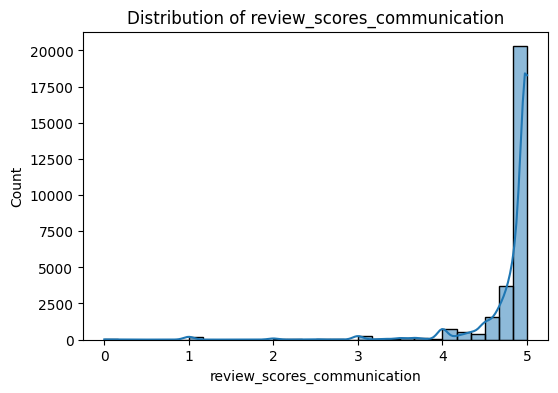

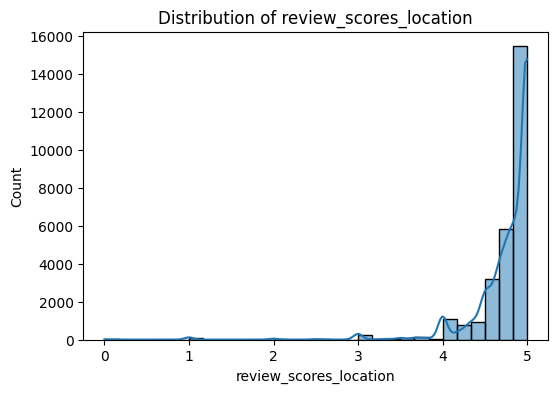

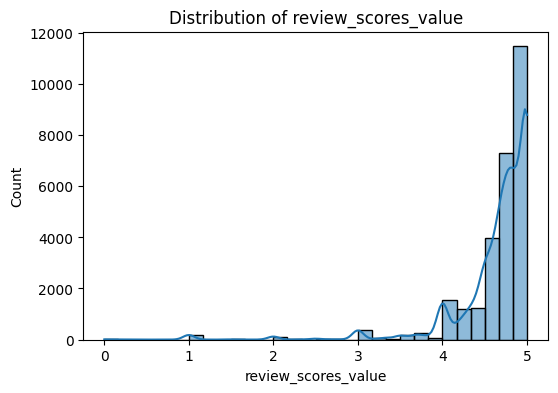

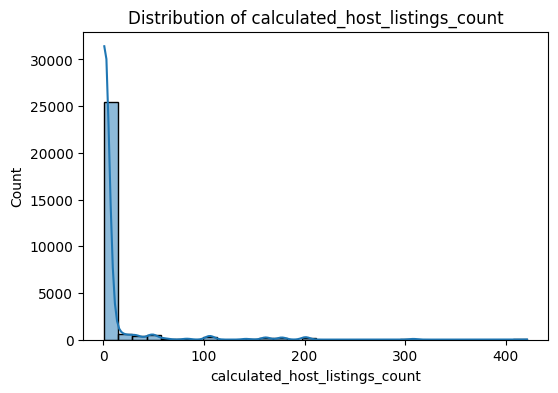

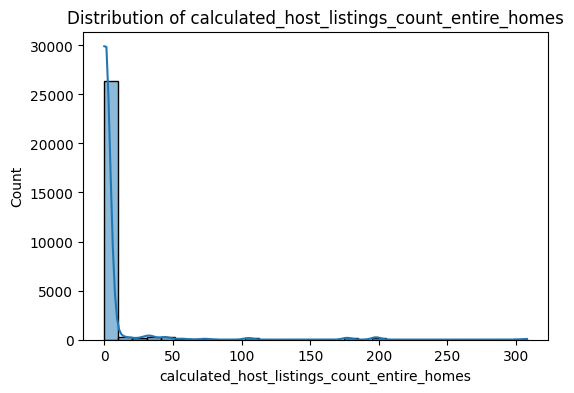

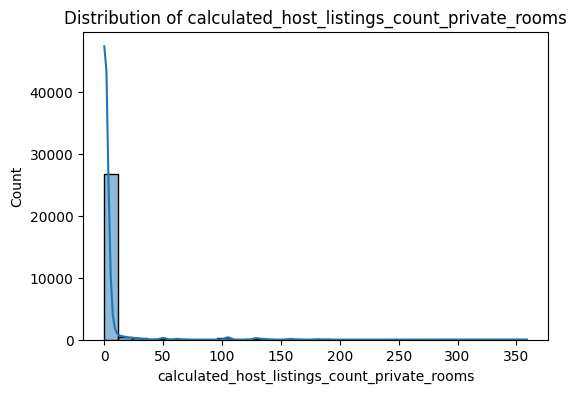

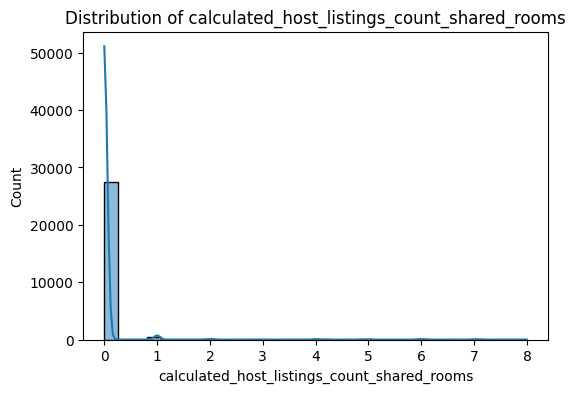

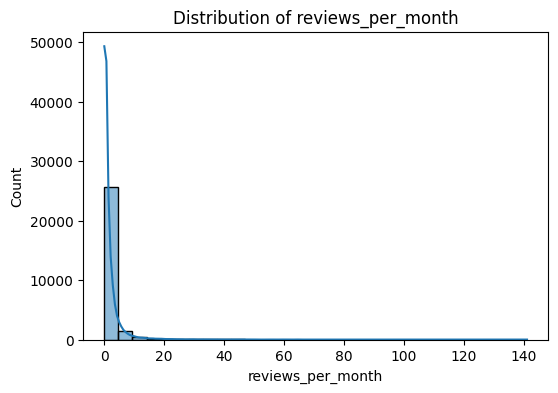

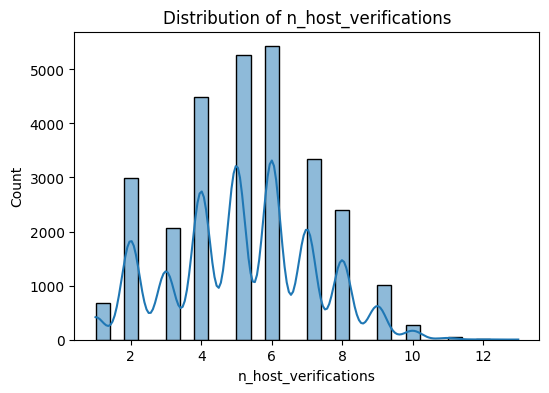

In [10]:
# code to plot each numeric column 
for col in numeric_columns:
    plt.figure(figsize=(6, 4)) #setting a figure of a reasonable size 
    sns.histplot(df[col], bins=30, kde=True) 
    # ^ here, I set bins to 30 so its easier to plot, 
    # and kde = true so I can see a line and distribution of the data easier 
    plt.title(f'Distribution of {col}')
    plt.show()

##### Observations on the Data Above: 

From the .describe(), what I primarily see is that many of the numeric columns aren't really standardized, and the mean and standard deviation vary a lot.... it appears the data isn't really distributed well. However, seeing the numbers is one thing and seeing an actual graph is another. I am kind of a visual learner, so I tried to plot the graphs to see the data. Below, I summarize the distributions I note of each columnn: 

<b>host_response_rate:</b> it varies from 0 to 1, and is skewed to the left

<b>host_acceptance_rate:</b> also varies from 0 to 1, also a bit left skewed with two peaks (at 1 and like .8)

<b>host_listings_count:</b> varies from 0 to 3500 but is heavily right skewed with peaks near 0-300 range 

<b>host_total_listings_count:</b> similarly also heavily right skewed, and varying from 0 to 3500 with peak near 0-300 ish range again

<b>accomodates:</b> right skewed, ranges from 0 to 16, peak at 2-3 

<b>bathrooms:</b> again also right skewed, ranges from 0 to 8, peak at 1 maybe

<b>bedrooms:</b> also heavily right skewed, ranges from 0 to 12, peak probably at 1-2 ish 

<b>beds:</b> also heavily right skewed, ranges from 0 to 20, peak somewhere between 1 and 2.5 probably (I can't tell)

<b>price (this is the label):</b> right skewed, ranges from 0 to 1000, peak probably happening at around the 100s somewhere 

<b>minimum_nights:</b> really heavily heavily right skewed, the range is a bit hard to tell... And peak somewhere between 0 to 50 probably 

<b>maximum_nights:</b> also heavily heavily right skewed

<b>minimum_minimum_nights:</b> really heavily right skewed 

<b>maximum_minimum_nights:</b> really heavily right skewed 

<b>minimum_maximum_nights:</b> really heavily right skewed

<b>maximum_maximum_nights:</b> really heavily right skewed

<b>minimum_nights_avg_ntm:</b> really heavily right skewed 

<b>maximum_nights_avg_ntm:</b> really heavily right skewed 

<b>availability_30:</b> mostly right skewed, ranges from 0 to 30, peak near 0-3 ish, with a very small increase around 30

<b>availability_60:</b> mostly right skewed, ranges from 0 to 60, peak near 0-2 ish again, a very small rise around 30, and very small rise at around 60 

<b>availability_90:</b> again, mostly right skewed, ranges from 0 to 90, peak near 0-2 ish, smallest slight bump at 30, a slightly higher bump at 60, and slightly higher than that bump at 90 ish

<b>availability_365:</b> right skewed mostly, ranges from 0 to 350, peak again near the smaller values like 0-2, but ocassionally has slight bumps and a super small peak at 350 ish

<b>number_of_reviews:</b> also mostly right skewed, peak near 0-100 ish probably, ranges from 0 to 1000

<b>number_of_reviews_ltm:</b> also pretty right skewed, peak near 0-20 ish probably, ranges from 0 to 700 

<b>number_of_reviews_I30d:</b> very much right skewed, ranges from 0 to 70, peaks near 0-5 probably 

<b>review_scores_rating:</b> pretty left skewed, peak at around 5 ish, ranges from 0 to 5

<b>review_scores_cleanliness:</b> also pretty left skewed, with peak at 5 ish, ranges from 0 to 5

<b>review_scores_checkin:</b> also pretty much left skewed, peak near 5, ranges from 0 to 5

<b>review_scores_communication:</b> also very left skewed, peak near 5, ranges from 0 to 5

<b>review_scores_location:</b> again, very much left skewed, peak near 5, ranges from 0 to 5

<b>review_scores_value:</b> also very much left skewed, peak near 5, ranges from 0 to 5

<b>calculated_host_listings_count:</b> very heavily right skewed, peak near 0-10 probably, ranges from 0 to 400

<b>calculated_host_listings_count_entire_homes:</b> also very heavily right skewed, peak near 0-10 probably, ranges from 0 to 300

<b>calculated_host_listings_count_private_rooms:</b> again, also very heavily right skewed, peak near 0-10 range again probably, and ranges from 0 to 350

<b>calculated_host_listings_count_shared_rooms:</b> once again, very heavily right skewed, ranging from 0 to 8, peak near 0 ish? and very, very low amt for 1 

<b>reviews_per_month:</b> also very right skewed, peak around 0-10, ranges from 0 to 140

<b>n_host_verifications:</b> probably the most normal distribution looking thing. its sliiightly pushed to the left/lower values, but kinda looks like a normal distribution to me. Ranges from 0 to 12, peaks at around 6

------------------------------------------------------------------------

While I know there are some models (like tree based models) that don't really need standardizing of the numeric data (since they operate on more of a threshold like system), I still think my data might benefit from some kind of standardization especially if I consider to explore other models for the regression task (like a neural network, which will then require standardization or scaling of the values in order to give the best performance). 

##### Winsorization (to remove outliers)

First, I plan to mitigate outliers first. Again, while I know there are models that are less sensitive to outliers, I still think it might be good procedure to get rid of them so the data can be cleaner. I will try to use winsorization on all the numeric columns with the code below

In [11]:
# winsorizing the numeric columns:
for col in numeric_columns:
    df[col] = mstats.winsorize(df[col], limits=[0.01, 0.01])

<br>

##### Log Transformation: 

As I described above, I also noticed that many of my feature columns were very skewed (especially right skewed), and I believe we have been informed in a prior lesson than log function transformation of data can help to mitigate these effects, and bring about a more normal distribution. Hence, I went through all the feature columns and tried to select the ones I thought would benefit the most from a log transformation (shown below in the log_transform_columns). I also did a very small check to ensure that everything was positive, since the log function won't take in any negative values. Then I just applied the log function to these specific feature columns. 

In [12]:
# since so many things are skewed, esp to right, trying to transform these by log function
# it was mentioned in a lesson that log function can transform skewed values
log_transform_columns = ['host_listings_count', 'host_total_listings_count', 'accommodates', 'bathrooms', 
                         'price',   'bedrooms', 'beds', 'availability_30', 'number_of_reviews', 
                         'number_of_reviews_ltm', 'number_of_reviews_l30d', 'calculated_host_listings_count', 
                         'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 
                         'calculated_host_listings_count_shared_rooms', 'reviews_per_month']


# ^ picked out all the heavily right skewed and saved to a list

# all values must be positive when applying log...
# so im adding a small constant just in case:
for col in log_transform_columns :
    if (df[col] <= 0).any():
        df[col] = df[col] + 1

# applying the log transformation to the specified columns:
df[log_transform_columns] = df[log_transform_columns].apply(np.log)

<br>

##### Scaling the Data

Again, I had a couple of options for how I wanted to scale the data. However, seeing as how a lot of the feature columns were skewed, and that you might use StandardScaler for more normal-ish distributions, I thought that perhaps MinMax scaling would be the way to go (to bring it to a range between 0 and 1). Then I called fit_transform on <i>all</i> the numeric columns. 

In [13]:
# using MinMaxScaler on ALL the numeric columns (to bring them to (0, 1) range
scaler = MinMaxScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

<br>

##### Plotting the Data Once More

Just to check if there have been any changes, I decided to plot the data once again to see if the distributions have changed at all

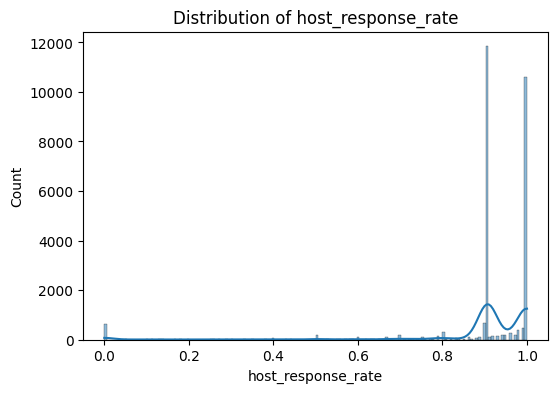

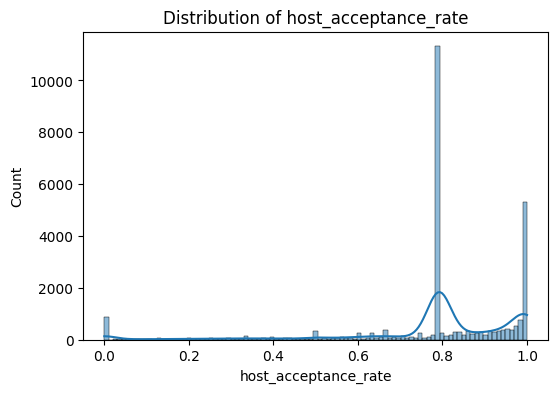

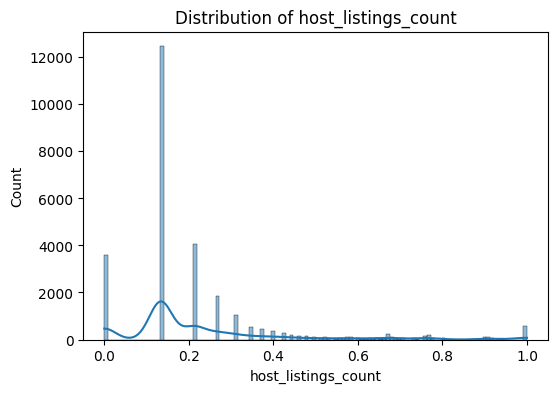

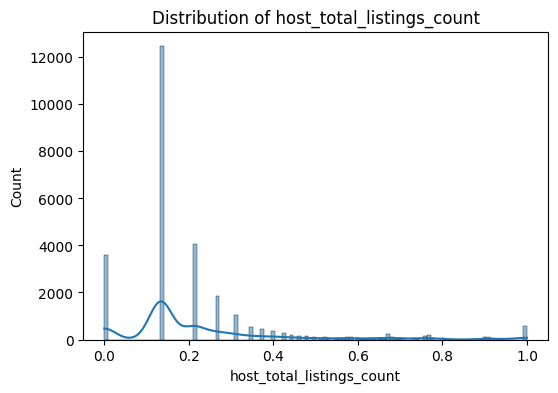

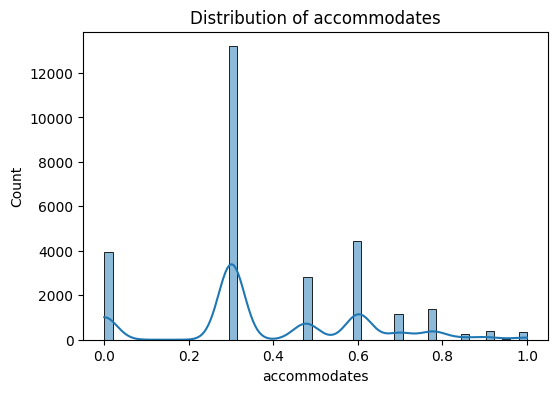

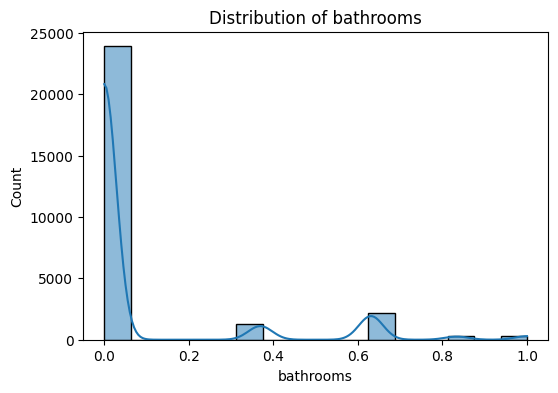

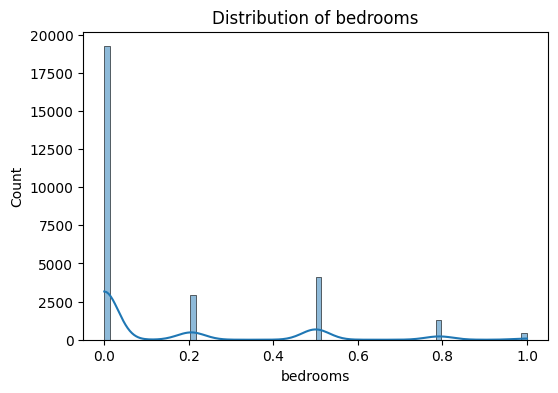

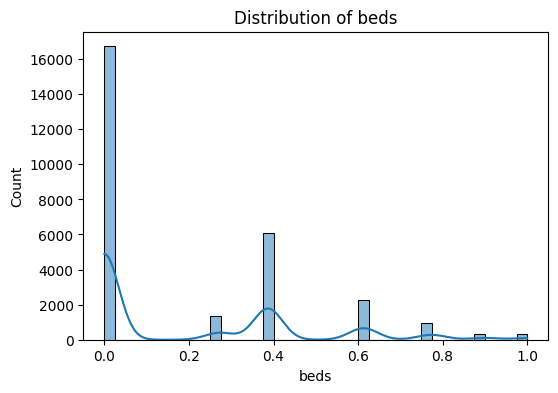

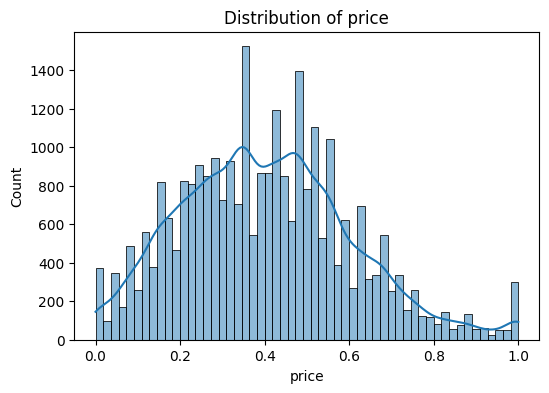

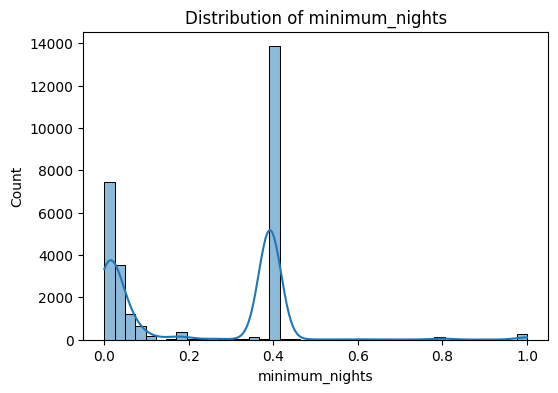

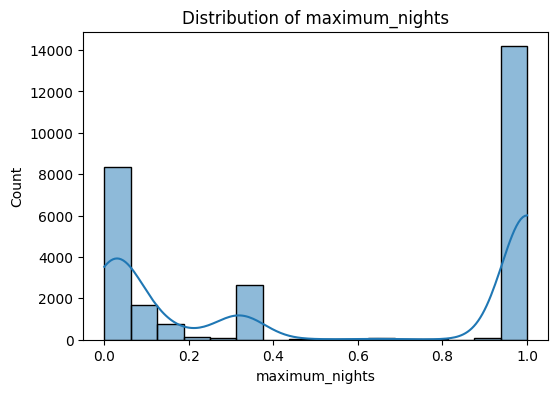

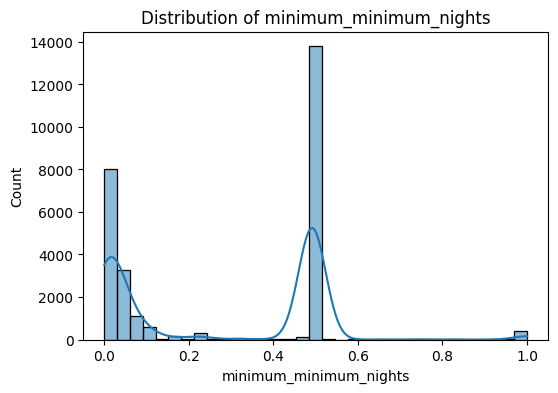

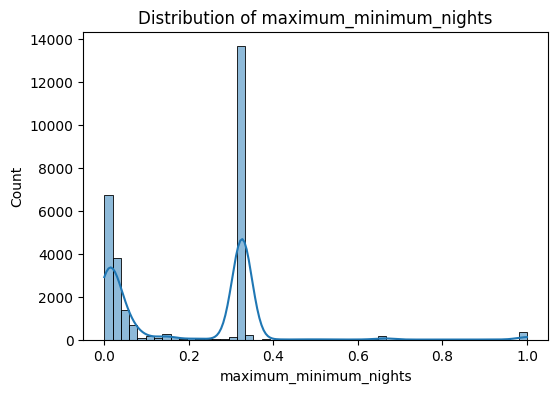

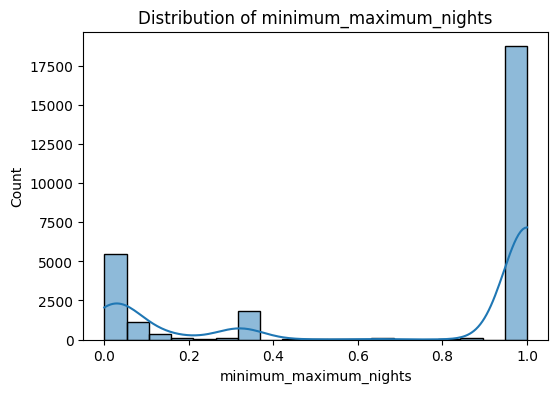

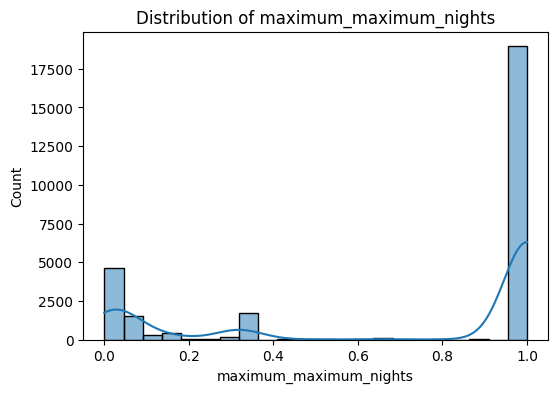

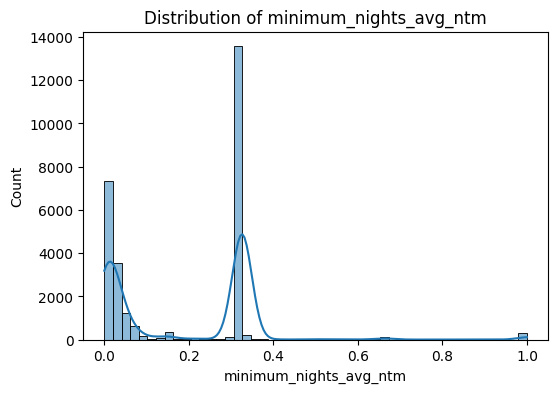

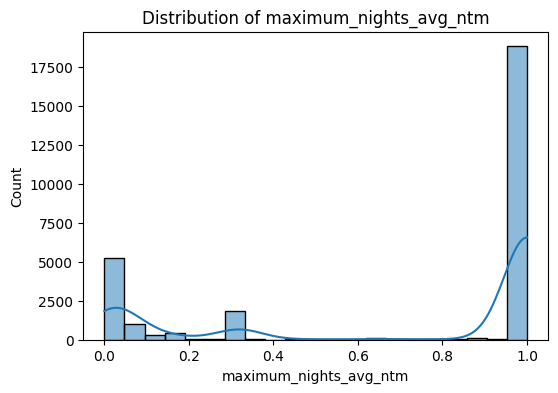

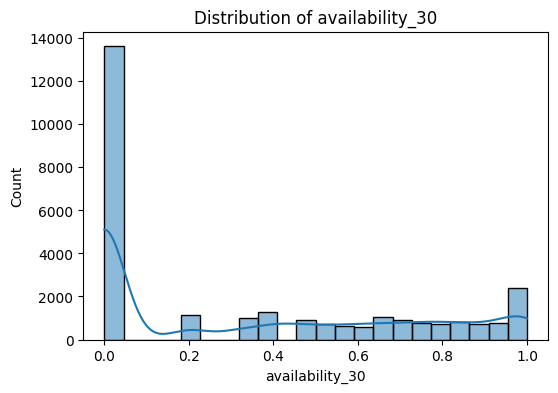

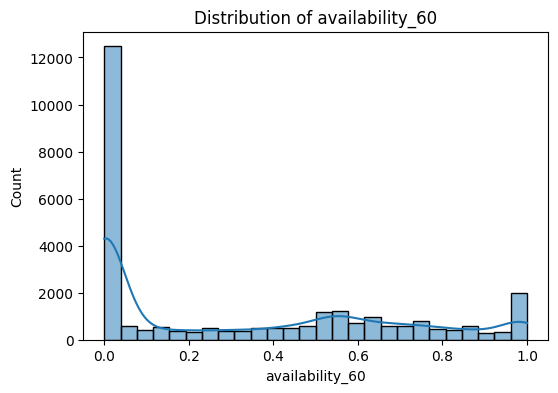

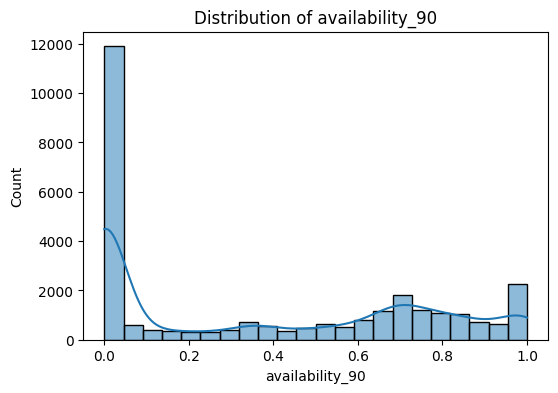

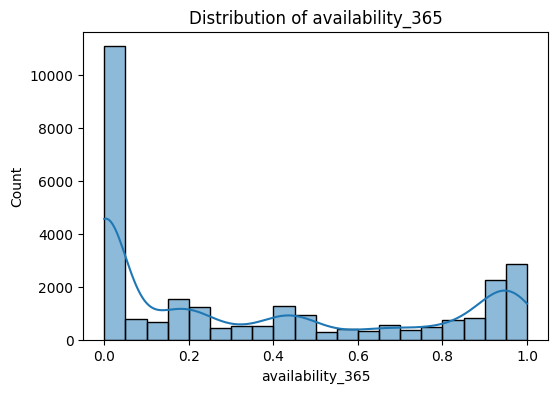

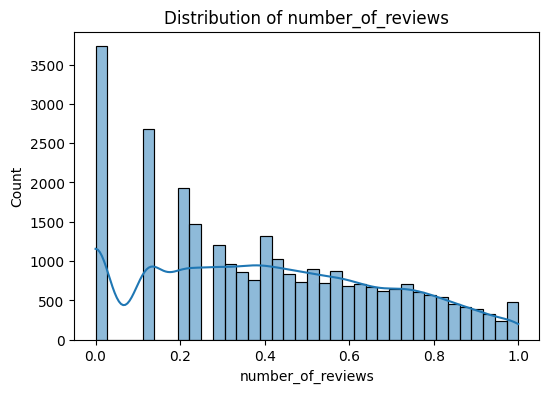

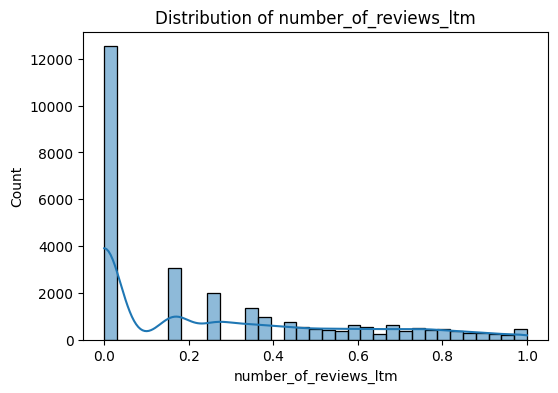

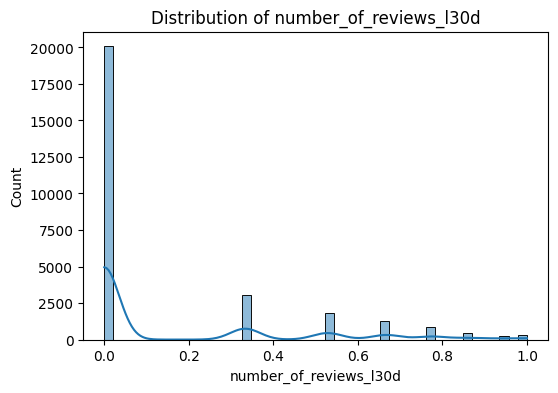

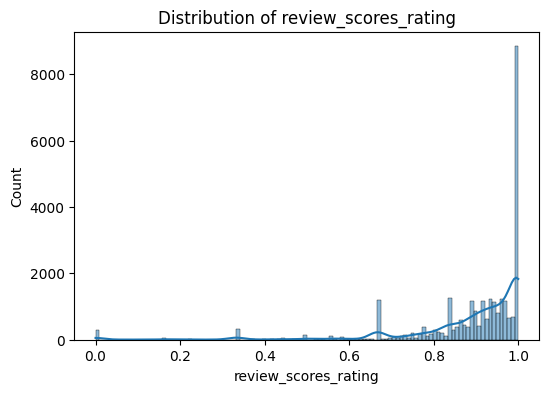

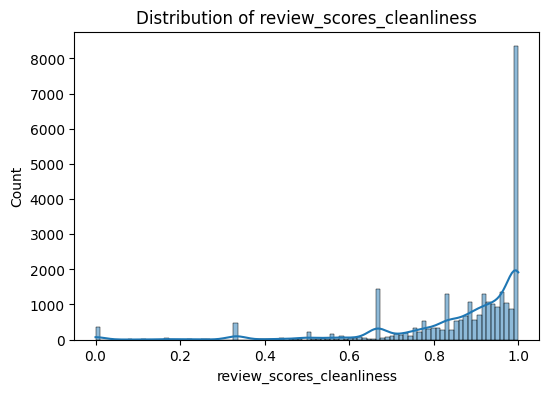

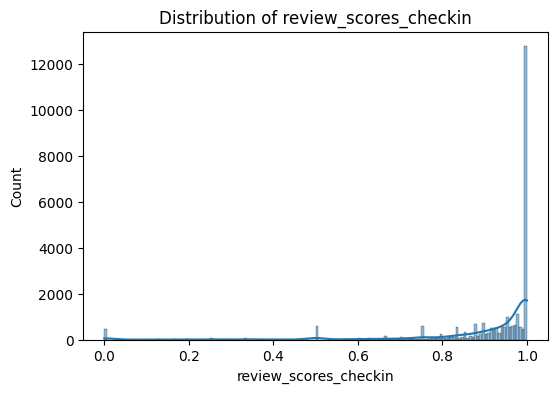

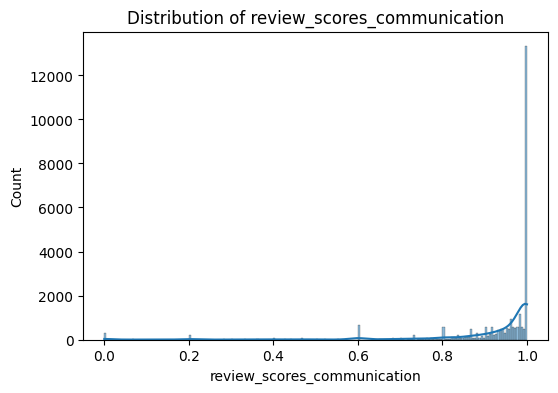

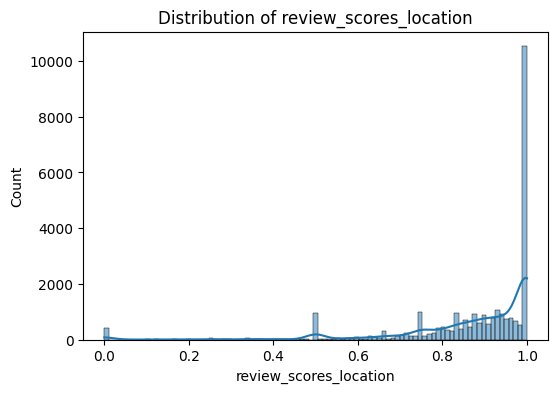

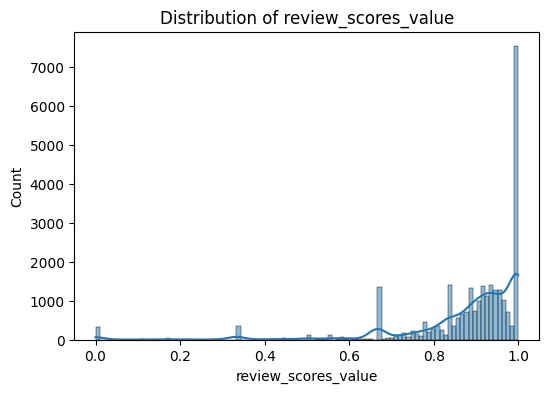

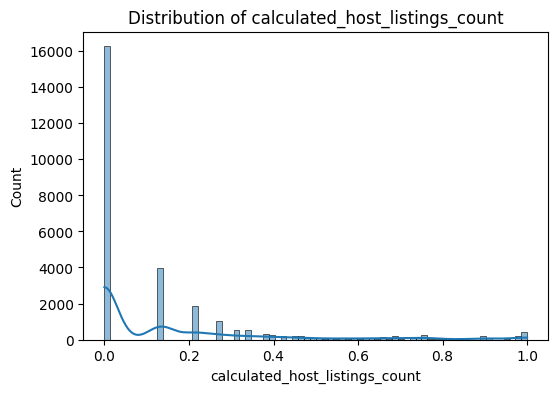

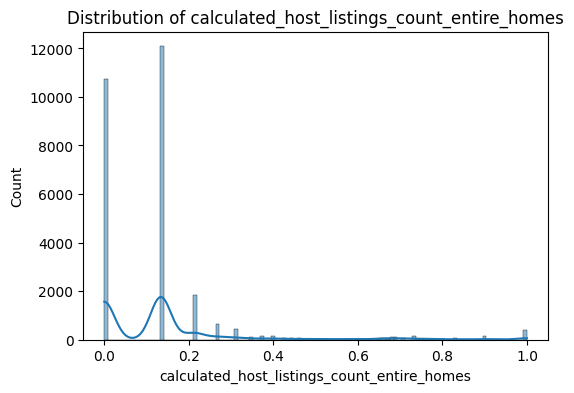

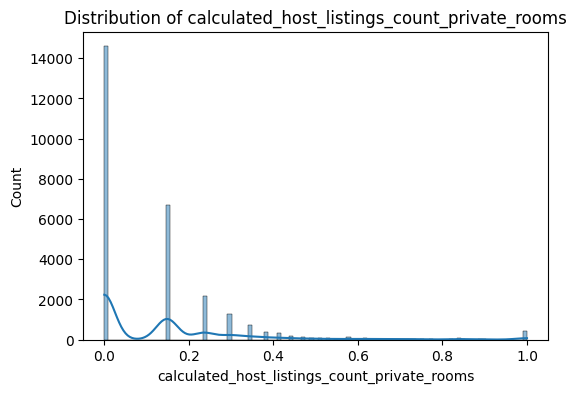

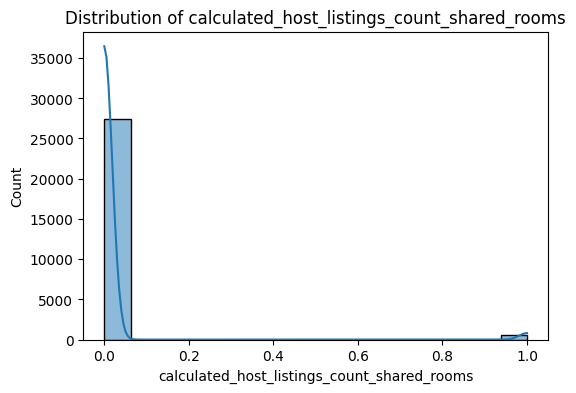

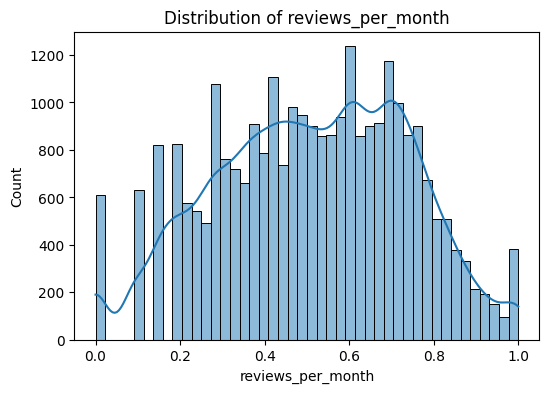

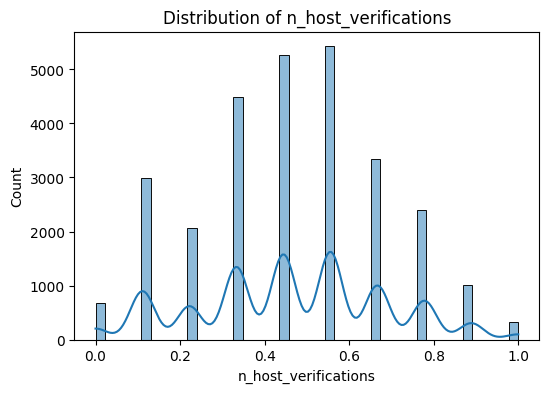

In [14]:
# plotting again to see if there have been any changes: 
for col in numeric_columns:
   plt.figure(figsize=(6, 4))
   sns.histplot(df[col], kde=True)
   plt.title(f'Distribution of {col}')
   plt.show()

##### Observations on Transformed Distributions

I think that many of the distributions are now hopefully better to work with (I especially see that it was effective for transforming the 'price' and 'reviews_per_month' columns into a more normal distribution). Again, I'm aware that this kind of standardization and transformation is more important for models like neural networks and not really for tree based models, but I just wanted to try and see if it would help to do this scaling step anyway (just as an extra measure). 

#### Dealing with Boolean Features 

I also noticed that some of the columns had "True" or "False" as values, which makes sense as they are 'yes/no' or boolean type information. However, I believe that information is currently stored as a string object type instead of a numeric type the model can perhaps use (like 0 or 1). So, in the code below, I save the boolean columns (the ones I found to contain 'True' or 'False'), and then for every value, I just converted/casted it to an integer, which should automatically make them either 0 or 1. 

In [15]:
# Converting string object to boolean (the ones that say True or False)

bool_cols = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'instant_bookable', 'has_availability']
# ^ I inspected the data, and found the ones that have 'True' and 'False' 

print(df[bool_cols].head()) # to see what it looks like before 

for col in bool_cols:
    df[col] = df[col].astype(int) # converting the values to int


df[bool_cols].head() # to see what it looks like after

   host_is_superhost  host_has_profile_pic  host_identity_verified  \
0               True                  True                    True   
1               True                  True                    True   
2               True                  True                    True   
3               True                  True                    True   
4               True                  True                    True   

   instant_bookable  has_availability  
0             False              True  
1             False              True  
2             False              True  
3             False              True  
4             False              True  


,host_is_superhost,host_has_profile_pic,host_identity_verified,instant_bookable,has_availability
0,1,1,1,0,1
1,1,1,1,0,1
2,1,1,1,0,1
3,1,1,1,0,1
4,1,1,1,0,1


##### Checking for Numeric NaN once more

Since the converted booleans are now numeric types, it wouldn't hurt to check if all the numeric features/columns have their missing values taken care of once more (as an extra measure): 

In [16]:
num_nan_count = np.sum(df[numeric_columns].isnull(), axis = 0)
num_nan_count

host_response_rate                              0
host_acceptance_rate                            0
host_listings_count                             0
host_total_listings_count                       0
accommodates                                    0
bathrooms                                       0
bedrooms                                        0
beds                                            0
price                                           0
minimum_nights                                  0
maximum_nights                                  0
minimum_minimum_nights                          0
maximum_minimum_nights                          0
minimum_maximum_nights                          0
maximum_maximum_nights                          0
minimum_nights_avg_ntm                          0
maximum_nights_avg_ntm                          0
availability_30                                 0
availability_60                                 0
availability_90                                 0


<br>

### Dealing with Object/String Features

My next preprocessing/data cleaning task involves dealing with object/string type data. Typically, if the missing values are few, I believe one strategy is to simply drop the columns with missing values. However, I plan to try to get the most out of the object/string data by using common string processing techniques (like one hot encoding, or even frequency encoding), and <i>also</i> try to use some NLP techniques (TFIDF, word embeddings, sentimentality analysis, MultiLabelBinarizer, etc.) in order to get the most out of my data if possible. I will definitely have an abundance of features after this (perhaps 100 or more), so I definitely plan to do one more stage of data prep with feature selection and picking out only the most relevant features to train a potential model on. 

#### Inspecting Object/String Columns & Dealing with NaN

First, as usual, I want to take a look at the object string columns, and get a feel for how many unique values each string feature has. I also want to inspect what the NaN count for each object column is, and which columns specifically have missing values. The following code does that by selecting all the object type columns, and using the .nunique() function to see what the unique values for each individual feature are. Then, I use the np.sum to sum up the NaN counts along each string feature, and then make a condition to only select the columns that have missing values. 

In [17]:
object_cols = df.columns[df.dtypes == 'object'].tolist()
print("Unique values: \n\n", df[object_cols].nunique(), "\n\n")

obj_nan_count = np.sum(df[object_cols].isnull(), axis = 0)
print("NaN counts: \n\n", obj_nan_count, "\n")

obj_condition = obj_nan_count != 0 # conditoin to get cols with missing values

obj_col_names = obj_nan_count[obj_condition].index.tolist() # getting the column names w/ missing vals and converting to a list 
print("Columns with missing values: \n", obj_col_names)

Unique values: 

 name                            27386
description                     25952
neighborhood_overview           15800
host_name                        7566
host_location                    1364
host_about                      11962
neighbourhood_group_cleansed        5
room_type                           4
amenities                       25020
dtype: int64 


NaN counts: 

 name                                5
description                       570
neighborhood_overview            9816
host_name                           0
host_location                      60
host_about                      10945
neighbourhood_group_cleansed        0
room_type                           0
amenities                           0
dtype: int64 

Columns with missing values: 
 ['name', 'description', 'neighborhood_overview', 'host_location', 'host_about']


<br>

##### Dealing with Object/String NaN 

For the missing values, as I mentioned before, I believe it's common to drop whole rows if there are only a few missing values. However, I want to take a different approach with my missing values, specifically applying either of the following two techniques: 
- For data I plan to one-hot-encode (or do some other form of binary encoding like with a MultiLabelBinarizer) or frequency encode, I plan to substitute and fill the NaN values with some placeholder value like 'missing', to indicate that these values were not present. I believe for these techniques, it would help to avoid excess columns or to make it easier to indicate missing values.
- For the remaining columns that I plan to use NLP techniques on, I might simply replace NaN values with an empty string (''). I think this might be more helpful for NLP techniques than replacing with 'missing', since models such as Word2Vec will be learning from words/strings I pass in, and it might be less confusing overall when trying to apply various NLP techniques. 

In [18]:
# removing nan values: 

# the columns I plan to one hot encode and frequency encode: 
# they might benefit from placeholder like 'missing' to avoid excess columns or to make more identifiable:
df['name'].fillna('missing', inplace=True)
df['host_name'].fillna('missing', inplace=True)
df['host_location'].fillna('missing', inplace=True)
df['neighbourhood_group_cleansed'].fillna('missing', inplace=True)
df['room_type'].fillna('missing', inplace=True)
df['amenities'].fillna('missing', inplace=True)

# the columns I plan to use NLP techniques for might benefit from simple '' replacing: 
df['description'].fillna('', inplace=True)
df['neighborhood_overview'].fillna('', inplace=True)
df['host_about'].fillna('', inplace=True)

# checking if the NaN values were successfully handled for the object/string type: 
obj_nan_count = np.sum(df[object_cols].isnull(), axis = 0)
obj_nan_count

name                            0
description                     0
neighborhood_overview           0
host_name                       0
host_location                   0
host_about                      0
neighbourhood_group_cleansed    0
room_type                       0
amenities                       0
dtype: int64

<br> 

#### One-Hot-Encoding and Frequency Encoding

Before I jump into anything NLP related, I will try to start with the easier processes in transforming the string objects in the dataset, such as one hot encoding and frequency encoding. There are a couple of feature columns that might benefit from this procedure (as they have certain values that can be ennumerated, or values that would be beneficial to convert to a frequency). However, for other columns in the Airbnb dataset that are related to descriptions, I plan to process these with methods like TDFIDF, word embeddings or sentimentality analysis.

<br>

##### One Hot Encoding

Starting with one hot encoding, I've noticed two feature columns in particular that might benefit from this procedure: 'neighborhood_group_cleansed' and 'room_type'. These columns have only a few values in them (when I checked the .nunique() output above, as well as below in the following code cell when I print out each unique value using .unique()). These values are better for one hot encoding, so I apply it to them via the pandas' get_dummies method. Then, I finally check the resulting columns to see if the correct changes have been made. 

In [19]:
print("Unique values: \n")
print(df['neighbourhood_group_cleansed'].unique())
print(df['room_type'].unique(), "\n")

encode_columns = ['neighbourhood_group_cleansed', 'room_type']

# Perform one-hot encoding
df = pd.get_dummies(df, columns=encode_columns)

# Check the resulting DataFrame
df.columns

Unique values: 

['Manhattan' 'Brooklyn' 'Queens' 'Staten Island' 'Bronx']
['Entire home/apt' 'Private room' 'Hotel room' 'Shared room'] 



Index(['name', 'description', 'neighborhood_overview', 'host_name',
       'host_location', 'host_about', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'review_scores_rating',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'calculated_host_

<br>

##### Frequency Encoding

While one hot encoding is useful for values where it's easy to ennumerate different types (like the different room types), I noticed other features had far too many unique values to be one-hot-encoded (sometimes in the thousands!) Thus, for these I want to try a technique called frequency encoding. I essentially save all the columns I want to frequency encode to a list, and then I take the value counts (which gives me how much of a unique value there is for each column), and then divide that by the length of the dataframe. This should give me relative frequencies and importance to the overall dataset for each value in each column. 

Below, I selected three columns I wish to frequency encode ('host_location','host_name', and 'name), and then apply this procedure to get a frequency series (saved as freq). I inspect them first to see what their unique values are, and how many of these unique values are present using the value_counts() method (I also inspect the first 5 of each though, since there are literally hundreds of unique values). I then plan to create new frequency encoded columns in the dataframe, and drop the original columns. However, one issue I encountered was when trying to merge this with the original dataframe. I can't just assign frequency to the new dataframe columns because I realized that there was an issue with the indices. The indices of the frequency series are the actual string names of each unique item in those feature columns, whereas the original dataframe has number indices. Therefore, to work around this, I just used the .map() function to map each frequency to its corresponding feature column location. After that, I just drop the original columns since they're no longer needed, and then check the resulting dataframe. 

In [20]:
print("First 5 unique values for each feature: \n")
print(df['host_location'].value_counts().head(), "\n")
print(df['host_name'].value_counts().head(), "\n")
print(df['name'].value_counts().head(), "\n")

# Columns to frequency encode
# frequency encode cuz they have so many values that cannot be one hot encoded
freq_encode_cols = ['host_name', 'host_location', 'name']

# applying frequency encoding:
for col in freq_encode_cols:
    freq = df[col].value_counts() / len(df)
    # ^ this calculates the unique frequency for each value 
    
    # mapping frequencies to the original column values
    
    df[col + '_freq_encoded'] = df[col].map(freq)
    
    # ^must map cuz freq gives u smth like each string and the corresponding val
    # this wont work because it doesnt align with df's number index
    # when I initially tried just assigning freq, it gave me all NaN

df.drop(columns=freq_encode_cols, inplace=True) # dropping, not needed anymore 

# checking how it looks:
df.head()

First 5 unique values for each feature: 

New York, New York, United States    16059
Brooklyn, New York, United States     3292
US                                    2816
Queens, New York, United States       1407
Bronx, New York, United States         243
Name: host_location, dtype: int64 

Karen       246
Michael     243
Jeniffer    193
David       179
Alex        141
Name: host_name, dtype: int64 

Water View King Bed Hotel Room       27
Beautiful King Bed Hotel Room        17
Beautiful 2 Double Bed Hotel Room    16
Studio Loft                          15
Hotel Room King Bed Chelsea          15
Name: name, dtype: int64 



,description,neighborhood_overview,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,...,neighbourhood_group_cleansed_Manhattan,neighbourhood_group_cleansed_Queens,neighbourhood_group_cleansed_Staten Island,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,host_name_freq_encoded,host_location_freq_encoded,name_freq_encoded
0,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,A New Yorker since 2000! My passion is creatin...,0.800000,0.170000,1,0.424029,0.424029,1,1,...,1,0,0,1,0,0,0,0.002855,0.573085,0.000036
1,"Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,Laid-back Native New Yorker (formerly bi-coast...,0.090000,0.690000,1,0.133766,0.133766,1,1,...,0,0,0,1,0,0,0,0.000036,0.573085,0.000036
2,We welcome you to stay in our lovely 2 br dupl...,,"Rebecca is an artist/designer, and Henoch is i...",1.000000,0.250000,1,0.133766,0.133766,1,1,...,0,0,0,1,0,0,0,0.001570,0.117479,0.000036
3,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",I used to work for a financial industry but no...,1.000000,1.000000,1,0.133766,0.133766,1,1,...,1,0,0,0,0,1,0,0.000036,0.573085,0.000036
4,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,Welcome to family life with my oldest two away...,0.906901,0.791953,1,0.133766,0.133766,1,1,...,1,0,0,0,0,1,0,0.000071,0.573085,0.000036


<br>

#### Text Preprocessing

Next, I want to focus on dealing with the descriptive string/object columns (such as description or host_about). But first, before I apply any NLP techniques to these columns, the text must be preprocessed first (and this encompasses tasks like removing punctuation, formatting, stop words, etc.). Thus, I use a combination of gensim.utils.simple_preprocess() (which is a method that we were informed about during one of our lessons in NLP), and some of python regex functions to clean up the descriptive text. I didn't only use the simple_proprocess as I noticed that it didn't really get rid of html tags (like the br tag). I also use the natural language toolkit's wordnet in order to obtain a lemmatizer (to lemmatize words to their root form). Right now, this function processes the text into a processed unbroken string, and while I'm aware some NLP techniques require tokenized text, I'm not doing that here just yet (since some other functions require the unbroken string input). 

In [21]:
nltk.download('stopwords') # getting english stopwords from the natural lang. toolkit 
nltk.download('wordnet') # downloading wordnet to help lemmatize the words 

stop_words = set(stopwords.words('english')) # im creating it as a set just in case 
# ^ I had to do loading outside (there was an issue later when trying to parallel process)

def preprocess_text(text):
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    words = list(gensim.utils.simple_preprocess(text))
    words = [w for w in words if w not in stop_words]
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)  

sentence = df.loc[0,'description'] 
# ^ just taking the first example of description as a random test sentence to see if it works

clean_text = preprocess_text(sentence)
clean_text

[nltk_data] Downloading package stopwords to /home/ubuntu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/ubuntu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


'beautiful spacious skylit studio heart midtown manhattan stunning skylit studio bed single full bath full kitchen fireplace centrally located wifi apple tv sheet towelsthe space spacious ft² immaculate nicely furnished designed studio tuck ultra comfortable bed skylight fall love myriad bright light city night sky single sized bed convertible floor mattress luxury bedding available upon request gorgeous pyramid skylight amazing diffused natural light stunning architectural detail soaring high vaulted ceiling exposed brick wood burning fireplace floor seating area natural zafu cushion modern style mixed eclectic art antique treasure large full bath newly renovated kitchen air conditioning heat high speed wifi internet apple tv centrally located heart midtown manhattan'

<br> 

##### Preprocessing all the Description Columns

Now, I'll apply the preprocessing function to all the values in each string column I want to use NLP techniques on. I found that I mainly want to apply this to 'description', 'neighborhood_overview', and 'host_about', as these seem to be descriptive features that would benefit most from NLP techniques and sentimentality extraction. 

One thing to note however, is that the first time I tried to do it, it took an <i>extreeeemely</i> long and unreasonable amount of time for the function to go through each value and apply this preprocessing (this was especially the case for the 'description' column). It makes sense, since there are over 28k examples for each column. Thus, I looked for ways I could speed this up, and the primary method I found was using the joblib package's Parallel to speed things up. Below, I inspect how many cores I have available to distribute the load of work using multiprocessing.cpu_count(), and then I feed this into the parallel_apply function I created, which passes this to the n_jobs parameter. I had to learn a lot of things to be able to apply this, such as what a generator expression is (it's apparently similar to a list comprehension, but it isn't called until you iterate over it). I also learned that joblib's 'delayed' is often used with Parallel, since it essentially 'wraps' the function (meaning that it isn't actually evaluated or executed yet until it's passed to the cores). This makes sense too, as it would defeat the purpose of using Parallel if it executes before I can pass it to the cores to distribute the load. The text data is taken from every text in each column, and then passed to this function. I also print when each task starts simply because I want to keep track if the process is going faster. 

In [22]:
# the task below is taking forever, so I want to see how many cores I have
# I want to parallel process across it across my cores to see if that speeds things up

cores = multiprocessing.cpu_count()  # checking how many cores I have
print("Number of cores available :", cores, "\n")


# function to make it faster (it was taking forever otherwise)
def parallel_apply(data, func, n_jobs=multiprocessing.cpu_count()):
    # ^ takes in column data, the function to apply, and the amt of cores on my computer
    results = Parallel(n_jobs=n_jobs)(delayed(func)(text) for text in data)
    # ^ im using joblib's Parallel in order to speed things up here 
    # here, I'm passing how I want the task split based on my CPU cores with n_jobs
    # then, I create a generator expression, which I learn is something that isn't called until you iterate over it
    # In the generator expression, I'm also using joblib's delayed so that I 'wrap' the function... 
    # this means that it's not actually executed until it's passed to the cores. That's how I plan to make it efficient
    # the text data is also passed for every text in the object/string feature column i'm on

    return results # returning results

print("starting description")
#df['description_clean'] = df['description'].progress_apply(preprocess_text) 
df['description_clean'] = parallel_apply(df['description'], preprocess_text)
print("ended description")

print("starting neighborhood")
#df['neighborhood_overview_clean'] = df['neighborhood_overview'].progress_apply(preprocess_text)
df['neighborhood_overview_clean'] = parallel_apply(df['neighborhood_overview'], preprocess_text)
print("ended neighborhood")

print("starting host_about")
#df['host_about_clean'] = df['host_about'].progress_apply(preprocess_text)
df['host_about_clean'] = parallel_apply(df['host_about'], preprocess_text)
print("ended host_about \n")

# checking if it was done correctly: 
df[['description_clean', 'neighborhood_overview_clean', 'host_about_clean']].head()

Number of cores available : 8 

starting description
ended description
starting neighborhood
ended neighborhood
starting host_about
ended host_about 



,description_clean,neighborhood_overview_clean,host_about_clean
0,beautiful spacious skylit studio heart midtown...,centrally located heart manhattan block subway...,new yorker since passion creating beautiful un...
1,enjoy top floor brownstone wood ceramic floori...,right mix urban center local neighborhood clos...,laid back native new yorker formerly bi coasta...
2,welcome stay lovely br duplex south slope broo...,,rebecca artist designer henoch marketing sale ...
3,please expect luxury basic room center manhatt...,theater district many restaurant around,used work financial industry work japanese foo...
4,best guest seeking safe clean spare room famil...,neighborhood full restaurant cafe plenty,welcome family life oldest two away college wa...


<br>

#### TFIDF Vectorization 

I plan to make both tfidf, word embeddings AND sentiment-analyzed encoded versions of all the object features. I understand again that this could result in too many cluttering features that the model might cause the overfit. Thus, to reiterate, at the end I want to see what would be most beneficial for my data since I plan to run feature importance tests as well as correlation tests. If I can somehow produce even a slightly beneficial feature or extract any bit of information from the object/string datatypes, that would all jhopefully help when training the model. I start with TFIDF vecorization (term frequency inverse document frequency), since it appears to be one of the more straightforward ways of expressing the text by weighted frequencies. In the below code, I reference one of our previous assignments using a TfidfVectorizer, fit it to each string column, saving the resulting matrix of weighted frequencies for each word into a pandas dataframe.

In [23]:
#using tfidf:

tfidf_vectorizer = TfidfVectorizer(min_df = 1, max_df = 0.9, max_features=100, ngram_range=(1,2)) 
# ^ I used settings from a previous assignment where we had to do tfidf 


description_tfidf = tfidf_vectorizer.fit_transform(df['description_clean']) 
#^ fit_transform to do the fitting and transforming in one step

description_tfidf_df = pd.DataFrame(description_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
# ^ i had to use get_feature_names_out() to get the words since get_feature_names() wasn't working ...

neighborhood_overview_tfidf = tfidf_vectorizer.fit_transform(df['neighborhood_overview_clean']) 
neighborhood_overview_tfidf_df = pd.DataFrame(neighborhood_overview_tfidf.toarray(), 
                                              columns=tfidf_vectorizer.get_feature_names_out())

host_about_tfidf = tfidf_vectorizer.fit_transform(df['host_about_clean']) 
host_about_tfidf_df = pd.DataFrame(host_about_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

description_tfidf_df # to check what it looks like

,access,also,apartment,area,available,away,bar,bathroom,beautiful,bed,...,two,use,view,walk,walking,walking distance,well,wifi,window,york
0,0.000000,0.000000,0.000000,0.108601,0.128134,0.000000,0.000000,0.000000,0.121961,0.252379,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.261370,0.00000,0.00000
1,0.000000,0.000000,0.160311,0.000000,0.000000,0.000000,0.000000,0.207552,0.000000,0.000000,...,0.000000,0.161734,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.00000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.254110,0.142162,0.000000,0.000000,0.199194,...,0.135386,0.000000,0.000000,0.120988,0.0,0.0,0.000000,0.000000,0.00000,0.00000
3,0.000000,0.122782,0.209884,0.000000,0.261131,0.109357,0.000000,0.090578,0.000000,0.171447,...,0.116527,0.141165,0.000000,0.104134,0.0,0.0,0.135071,0.133166,0.00000,0.00000
4,0.000000,0.000000,0.129939,0.000000,0.000000,0.000000,0.000000,0.252346,0.000000,0.079607,...,0.108212,0.131093,0.000000,0.000000,0.0,0.0,0.125434,0.000000,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28017,0.155897,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.134175,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.154257,0.0,0.0,0.000000,0.000000,0.00000,0.00000
28018,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.145445,0.000000,0.000000,...,0.187112,0.000000,0.000000,0.167213,0.0,0.0,0.000000,0.000000,0.00000,0.21938
28019,0.216550,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.274008,0.00000,0.00000
28020,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.00000


<br>

##### Saving only Means, Maxes, and Sums

However, as can be seen from the resulting example dataframe above, I get a matrix for <i>all</i> the words for EVERY single feature column. This is too much to add to the original pandas dataframe. Hence, below I attempt to efficiently capture the most significant aspects of the data by compacting each to a series of means, maxes, or sums across the entire feature columns. That way, I won't have too add too many new features to the dataframe (there are already far too many features!) I save the means, maxes and mins into statistics dataframes, and then finally concatenate this with the original dataframe. It's still too many features, but it's most likely more efficient than adding the entire TFIDF vectorization matrix (as seen above)

In [24]:
description_mean = np.array(description_tfidf.mean(axis=1)).flatten()
description_max = description_tfidf.max(axis=1).toarray().flatten()
description_sum = np.array(description_tfidf.sum(axis=1)).flatten()

# ^ np.array() is needed to convert the sum and mean to numpy arrays
# I'm not entirely sure why, but the max behaves differently from the others
# thus, I need to convert it by toarray() to make it dense. 

neighborhood_overview_mean = np.array(neighborhood_overview_tfidf.mean(axis=1)).flatten()
neighborhood_overview_max = neighborhood_overview_tfidf.max(axis=1).toarray().flatten()
neighborhood_overview_sum = np.array(neighborhood_overview_tfidf.sum(axis=1)).flatten()

host_about_mean = np.array(host_about_tfidf.mean(axis=1)).flatten()
host_about_max = host_about_tfidf.max(axis=1).toarray().flatten()
host_about_sum = np.array(host_about_tfidf.sum(axis=1)).flatten()

# turning each of these into panda dataframes:

description_stats = pd.DataFrame({
    'description_tfidf_mean': description_mean,
    'description_tfidf_max': description_max,
    'description_tfidf_sum': description_sum
})

neighborhood_overview_stats = pd.DataFrame({
    'neighborhood_overview_tfidf_mean': neighborhood_overview_mean,
    'neighborhood_overview_tfidf_max': neighborhood_overview_max,
    'neighborhood_overview_tfidf_sum': neighborhood_overview_sum
})

host_about_stats = pd.DataFrame({
    'host_about_tfidf_mean': host_about_mean,
    'host_about_tfidf_max': host_about_max,
    'host_about_tfidf_sum': host_about_sum
})

df = pd.concat([df, description_stats, neighborhood_overview_stats, host_about_stats], axis=1)
# ^ adding only the statistics features to dataframe 

df.head() # checking how it looks 

,description,neighborhood_overview,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,...,host_about_clean,description_tfidf_mean,description_tfidf_max,description_tfidf_sum,neighborhood_overview_tfidf_mean,neighborhood_overview_tfidf_max,neighborhood_overview_tfidf_sum,host_about_tfidf_mean,host_about_tfidf_max,host_about_tfidf_sum
0,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,A New Yorker since 2000! My passion is creatin...,0.800000,0.170000,1,0.424029,0.424029,1,1,...,new yorker since passion creating beautiful un...,0.044308,0.423189,4.430752,0.031158,0.588590,3.115842,0.032886,0.366892,3.288645
1,"Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,Laid-back Native New Yorker (formerly bi-coast...,0.090000,0.690000,1,0.133766,0.133766,1,1,...,laid back native new yorker formerly bi coasta...,0.040422,0.456228,4.042232,0.028243,0.744493,2.824336,0.024540,0.568207,2.454000
2,We welcome you to stay in our lovely 2 br dupl...,,"Rebecca is an artist/designer, and Henoch is i...",1.000000,0.250000,1,0.133766,0.133766,1,1,...,rebecca artist designer henoch marketing sale ...,0.050007,0.452075,5.000672,0.000000,0.000000,0.000000,0.016756,0.667268,1.675594
3,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",I used to work for a financial industry but no...,1.000000,1.000000,1,0.133766,0.133766,1,1,...,used work financial industry work japanese foo...,0.055614,0.451823,5.561371,0.016923,0.680059,1.692342,0.013650,0.867414,1.365001
4,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,Welcome to family life with my oldest two away...,0.906901,0.791953,1,0.133766,0.133766,1,1,...,welcome family life oldest two away college wa...,0.037001,0.563151,3.700095,0.016725,0.769644,1.672461,0.044393,0.444676,4.439276


<br> 

#### Word Embeddings 

The next technique I plan to use is word embeddings, in order to perhaps catch any meaningful syntax relationships between the words in each description feature column. I also reference the one word embeddings exercise in our NLP unit for this. Primarily, I begin first by transforming the text once again. While the cleaned and preprocessed data is good to use as is in the TFIDF vectorizer, I realized I needed to tokenize it to use it for word embeddings (since each words will need to be processed separately). Thus, in the below code I use .split() to tokenize the the text and turn it into a list of preprocessed words. 

I then used Word2Vec to train a separate model for each feature column (one for the Airbnb description, one for neighborhood overview, and one for the host information). Since these all have words that are probably specific to their descriptions (for example, host_about will have its own lingo and general connection between words that may be different from the syntactical nuances of the description column), I decide to train an individual model for each. As for the hyperparameters, I just utilized the ones that were in our exercise as a starting point. 

In [25]:
# word embeddings:

description_text = df['description_clean'].apply(lambda x: x.split()) 
# ^ need to split/tokenize since right now it's a long string... 
# each word needs to be processed separately 
neighborhood_text = df['description_clean'].apply(lambda x: x.split()) 
host_about_text = df['description_clean'].apply(lambda x: x.split()) 

# ^ i plan to train a word2vec model for each feature column so it can learn the
# nuances that are specific to each column... hopefully this will give a better result

word2vec_description = Word2Vec(description_text, vector_size=100, window=5, min_count=2)
word2vec_neighborhood = Word2Vec(neighborhood_text, vector_size=100, window=5, min_count=2)
word2vec_host_about = Word2Vec(host_about_text, vector_size=100, window=5, min_count=2)
# ^ I just used the hyperparameters that were in the word embeddings assignment as a starting point
# I also realized this could cause an issue on other people's end since the newer versions 
# use vector_size... since I'm doing this locally I had to change certain aspects to match older versions

<br>

##### Word Vector Averaging Function

Since all the word embeddings come in different sizes, its necessary for it to be uniform and consistent for the model to interpret it. Hence, in a similar spirit to the word embeddings assignment, I tried to create an averaging function to transform the data to a form the model utilize. My function takes in the text, the model, as well as the number of features (or vector size), and then I split the text into tokens. I also create a feature vector to capture all the word vectors that are in this particular text. I then loop through the words, and for every word in that specific text, I check if it's in the model's vocabulary (via model.wv.key_to_index) and then I create the word vector for that word and append it to the overall feature vector. At the end of the loop, I check if there's anything in the feature vector. If there is, I turn it into a numpy array and take the mean of each vector, and so I eventually end up with one average vector representing that one example. If there isn't anything in the feature vector to begin with, I simply fill a numpy array full of 0's and return that. 

In [26]:
# averaging function... this is necessary because all the word embeddings could be 
# different sizes, and it needs to be consistent and uniform when fed into the model 
# thus, I try to implement a function version of averaging the word vectors (similar to the assignment version): 

def get_average_word2vec(text, model, num_features):
    words = text.split()  # splitting raw text into words (again since its a long string)
    feature_vecs = []  # empty list to store all the word vectors

    for word in words:
        if word in model.wv.key_to_index: 
            vector = model.wv[word]
            feature_vecs.append(vector)
    # ^ essentially, for all the words in each example in each feature col, 
    # it checks if the word is in the vocabulary (I think that's what model.wv.key_to_index is)
    # and if so, it makes a word vector out of it. 
    # then, it appends the word vector to the overall list of word vecs for the feature
    
    if len(feature_vecs) > 0:
        feature_vecs = np.array(feature_vecs)
        return feature_vecs.mean(axis=0)
    else:
        return np.zeros((num_features,), dtype = float) 

    # ^ this is the actual averaging function. Size doesn't rly need to be checked 
    # for the first case, since its assumed the word2vec model makes a word vec 
    # of the size you specify. You just need to check that there IS something in there
    # if so, it turns all the feature vecs into a numpy array to easily calculate mean 
    # if not, it creates an array of all 0s and of type float (like in the wordvec coding assignment)

##### Applying the Averaging Function 

Finally, I apply the averaging function to all the string object columns and their related features, specifying the size to 100 (Again, this was the baseline used in the word embeddings exercise, so that's what I used as my starting point). I use a lambda function to more easily take in every text from each string column and then apply it. 

I also scale the values just in case, so they can be standardized if they are by any chance skewed. I do this by going through each word2vec feature, turning it into a list, and then going through and turning the list of vectors into a numpy array that I can scale. I finally add this back into the original dataframe. 

In [27]:
# applying the function to each feature to encode 
# via a lambda function to take in and apply averaging to each element:

df['description_word2vec'] = df['description_clean'].apply(lambda x: get_average_word2vec(x, word2vec_description, 100))
df['neighborhood_overview_word2vec'] = df['neighborhood_overview_clean'].apply(lambda x: get_average_word2vec(x, word2vec_neighborhood, 100))
df['host_about_word2vec'] = df['host_about_clean'].apply(lambda x: get_average_word2vec(x, word2vec_host_about, 100))


#I also want to scale the columns just in case for standardization, so I'll first convert them to a list:

df['description_word2vec'] = df['description_word2vec'].apply(lambda x: list(x))
df['neighborhood_overview_word2vec'] = df['neighborhood_overview_word2vec'].apply(lambda x: list(x))
df['host_about_word2vec'] = df['host_about_word2vec'].apply(lambda x: list(x))

# then I save all the word2vec columns as a list 
word2vec_columns = ['description_word2vec', 'neighborhood_overview_word2vec', 'host_about_word2vec']

# for each column, I convert it to a nummpy array (from a list of vectors), then scale the values 
for col in word2vec_columns:
    word2vec_values = np.array(df[col].tolist())
    scaled_values = scaler.fit_transform(word2vec_values)
    df[col] = list(scaled_values)  # I then add the values to the dataframe


df.head() # checking how it looks

,description,neighborhood_overview,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,...,description_tfidf_sum,neighborhood_overview_tfidf_mean,neighborhood_overview_tfidf_max,neighborhood_overview_tfidf_sum,host_about_tfidf_mean,host_about_tfidf_max,host_about_tfidf_sum,description_word2vec,neighborhood_overview_word2vec,host_about_word2vec
0,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,A New Yorker since 2000! My passion is creatin...,0.800000,0.170000,1,0.424029,0.424029,1,1,...,4.430752,0.031158,0.588590,3.115842,0.032886,0.366892,3.288645,"[0.5408471472517495, 0.5916503022027106, 0.609...","[0.5871001480056227, 0.39625801233328883, 0.54...","[0.42576238112663856, 0.4942040202401719, 0.43..."
1,"Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,Laid-back Native New Yorker (formerly bi-coast...,0.090000,0.690000,1,0.133766,0.133766,1,1,...,4.042232,0.028243,0.744493,2.824336,0.024540,0.568207,2.454000,"[0.5225506156999579, 0.6440828497090508, 0.722...","[0.35830830015038917, 0.37364435348337466, 0.5...","[0.3468455740829425, 0.5012531388450131, 0.417..."
2,We welcome you to stay in our lovely 2 br dupl...,,"Rebecca is an artist/designer, and Henoch is i...",1.000000,0.250000,1,0.133766,0.133766,1,1,...,5.000672,0.000000,0.000000,0.000000,0.016756,0.667268,1.675594,"[0.5712511311215263, 0.6533334226644094, 0.742...","[0.32142506216215605, 0.30531424874737423, 0.4...","[0.4078934207095556, 0.5181552847800968, 0.430..."
3,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",I used to work for a financial industry but no...,1.000000,1.000000,1,0.133766,0.133766,1,1,...,5.561371,0.016923,0.680059,1.692342,0.013650,0.867414,1.365001,"[0.5822771689008902, 0.5959597518202535, 0.662...","[0.42487810546227667, 0.5682104329794282, 0.71...","[0.4954743678064213, 0.5585576446797258, 0.522..."
4,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,Welcome to family life with my oldest two away...,0.906901,0.791953,1,0.133766,0.133766,1,1,...,3.700095,0.016725,0.769644,1.672461,0.044393,0.444676,4.439276,"[0.5200997161400512, 0.5869347004896506, 0.636...","[0.42552062410989605, 0.43023184259427, 0.5806...","[0.43822322339656655, 0.49239404531128395, 0.4..."


<br>

#### Sentiment Intensity Analysis

One more technique I want to try on the string feature columns is sentiment intensity analysis. The easiest (or most applicable?) one appeared to be the natural language toolkit's SentimentIntensityAnalyzer (from nltk.sentiment.vader). I wanted to experiment and see if it would be possible to extract any kind of sentiment from these descriptive features, and if that relative sentiment was <i>at all</i> correlated with the label (which is price of the Airbnb). Thus, I downloaded the NTLK vader_lexicon, created a SentimentIntensityAnalyzer object, and then applied it via a lambda function on every text in every feature column. Also it's interesting to note: In the documentation, apparently the polarity_scores method reads in the text and returns a dictionary containing the sentiment values for neg, neutral, pos, and compound scores. Of course, I want the overall sentiment of the description, so I specifically pick out the compound score. Once again, I try to standardize the values by the MinMax Scaler (just in case).

In [28]:
# sentimentality analysis with NLTK's SentimentIntensityAnalyzer (from ntlk.sentiment.vader)
# I thought it might be useful to run this on the description related features to extract sentiment maybe 
# I used VADER because I heard it's used a lot for social media sentiment analysis
# so I thought it was worth a shot 

nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

df['description_sentiment'] = df['description_clean'].apply(lambda x: sid.polarity_scores(x)['compound'])
df['neighborhood_overview_sentiment'] = df['neighborhood_overview_clean'].apply(lambda x: sid.polarity_scores(x)['compound'])
df['host_about_sentiment'] = df['host_about_clean'].apply(lambda x: sid.polarity_scores(x)['compound'])

# again, just standardizing all the values by scaling them:
sentiment_columns = ['description_sentiment', 'neighborhood_overview_sentiment', 'host_about_sentiment']
df[sentiment_columns] = scaler.fit_transform(df[sentiment_columns])

# ^ again, using a lambda function to apply it to each feature 
# I checked the documentation, and so polarity_scores reads in text and returns a dictionary containing neg, neutral, pos, and compound scores
# since I want the overall sentiment, I specifically tried to extract out the compound scores from the result 

df.head() # checking

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/ubuntu/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,description,neighborhood_overview,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,...,neighborhood_overview_tfidf_sum,host_about_tfidf_mean,host_about_tfidf_max,host_about_tfidf_sum,description_word2vec,neighborhood_overview_word2vec,host_about_word2vec,description_sentiment,neighborhood_overview_sentiment,host_about_sentiment
0,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,A New Yorker since 2000! My passion is creatin...,0.800000,0.170000,1,0.424029,0.424029,1,1,...,3.115842,0.032886,0.366892,3.288645,"[0.5408471472517495, 0.5916503022027106, 0.609...","[0.5871001480056227, 0.39625801233328883, 0.54...","[0.42576238112663856, 0.4942040202401719, 0.43...",0.995170,0.419757,0.982239
1,"Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,Laid-back Native New Yorker (formerly bi-coast...,0.090000,0.690000,1,0.133766,0.133766,1,1,...,2.824336,0.024540,0.568207,2.454000,"[0.5225506156999579, 0.6440828497090508, 0.722...","[0.35830830015038917, 0.37364435348337466, 0.5...","[0.3468455740829425, 0.5012531388450131, 0.417...",0.924637,0.845517,0.628039
2,We welcome you to stay in our lovely 2 br dupl...,,"Rebecca is an artist/designer, and Henoch is i...",1.000000,0.250000,1,0.133766,0.133766,1,1,...,0.000000,0.016756,0.667268,1.675594,"[0.5712511311215263, 0.6533334226644094, 0.742...","[0.32142506216215605, 0.30531424874737423, 0.4...","[0.4078934207095556, 0.5181552847800968, 0.430...",0.975147,0.496998,0.814199
3,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",I used to work for a financial industry but no...,1.000000,1.000000,1,0.133766,0.133766,1,1,...,1.692342,0.013650,0.867414,1.365001,"[0.5822771689008902, 0.5959597518202535, 0.662...","[0.42487810546227667, 0.5682104329794282, 0.71...","[0.4954743678064213, 0.5585576446797258, 0.522...",0.944962,0.496998,0.488202
4,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,Welcome to family life with my oldest two away...,0.906901,0.791953,1,0.133766,0.133766,1,1,...,1.672461,0.044393,0.444676,4.439276,"[0.5200997161400512, 0.5869347004896506, 0.636...","[0.42552062410989605, 0.43023184259427, 0.5806...","[0.43822322339656655, 0.49239404531128395, 0.4...",0.998038,0.496998,0.990326


<br>

#### MultiLabelBinarizer for Amenities

Finally, one last feature I want to encode/transform is the 'amenities.' I feel like this has a lot of potential to be usedul as a feature in predicting the price (as I would imagine the amount and quality of amenities affects the Airbnb price). However, it's not a descriptive text like thing I can obtain a sentiment extraction out of. It also has far too many values to encode via something like one-hot-encoding (I learned that while working with the amenities the hard way). Hence, I want to try something called a MultiLabelBinarizer. Essentially, it's very similar and reminiscent to one-hot-encoding, but with a few key differences. Both are binary encoding techniques, but while one hot encoding leads with one categorical variable (for example, an item might only have <i>one</i> color: blue, green, red, etc.), MultiLabelBinarizer, as the name suggests, deals with the case where an item has multiple categorical variable. Say for instance one listing has a Wifi and pool, but no kitchen. This might be represented in the dataframe row as [1 1 0]. If another listing has wifi, no pool, and a kitchen, this might look like [1 0 1] in the dataframe row. So I thought that I could perhaps try to  use MultiLabelBinarizer for this particular 'amenities' feature. However, as I'll soon show in my code... the one drawback is that it significantly increases the dimensionality of my dataframe, so I'll need to eventually choose only the pertinent features at the end. 

##### Cleaning Amenities Text

Of course, I need to preprocess the amenities text as well. However, I believe the amenities are structured in a different way from the typical text data (as in they're shown in the original data as "[ amenity, amenity, amenity...]"). I don't think it needs the same level of preprocessing as the other text data, but I still do need to clean it to ensure that all the entries are distinct. Below, I run a simple code in clean_amenities to strip the brackets, and then also to replace the double quotes, as well as to tokenize/split the amenities at the comma, so it effectively turns the amenities into an actual list of amenities instead of a string. However, I noticed that this isn't enough... as there are many odd entries in amenities that are super long (for example, the first time I tried running this code, I got something that looks like "Renpure Originals Coconut Cream Nourishing Shampoo shampoo" as one of the amenities in the MultiLabelBinarizer matrix.... obviously, if all the amenities are too 'unique' like this, it poses a problem). Hence, I created a second function called filter_amenities that only accepts amenities that have less than 5 words (using the amenity.split() to split each amenity, and then see if the length is less than 5). I unfortunately don't know enough to get rid of some of the more complicated knots in cleaning amenities (like Pack \\u2019n play/Travel crib, or  Children\\u2019s books and toys) but I did try to  clean it the best I can. 

In [29]:
def clean_amenities(amenities):
    if pd.isna(amenities):
        return [] # if there's NaN (just in case) I replace it with a simple bracket
    amenities = amenities.strip('[]').replace('"', '').split(', ') 
    # ^ stripping brackets, replacing the double quotations
    return amenities

df['amenities_clean'] = df['amenities'].apply(clean_amenities)


def filter_amenities(amenities):
    filtered_amenities = [amenity for amenity in amenities if len(amenity.split()) < 5]
    # ^ taking in only the amenities that have less than 5 words
    return filtered_amenities

df['amenities_clean'] = df['amenities_clean'].apply(filter_amenities)

# just looking at filtered amenities to check
df['amenities_clean'].head()

0    [Extra pillows and blankets, Baking sheet, Lug...
1    [Extra pillows and blankets, Luggage dropoff a...
2    [Kitchen, BBQ grill, Cable TV, Carbon monoxide...
3    [Room-darkening shades, Lock on bedroom door, ...
4    [Breakfast, Carbon monoxide alarm, Fire exting...
Name: amenities_clean, dtype: object

<br>

##### Applying MultiLabelBinarizer

The next step is to actually use the MultiLabelBinarizer, for which I first create the object and name it 'mlb'. Then, I use the fit_transform() method on the amenities clean dataframe to get the encoded amenities matrix (which I convert to a pandas dataframe, using mlb.classes_ to get out each amenity name for the columns). However, as you'll see, I can't just add it to the original dataframe as is...

In [30]:
mlb = MultiLabelBinarizer()
amenities_encoded = mlb.fit_transform(df['amenities_clean'])

amenities_df = pd.DataFrame(amenities_encoded, columns=mlb.classes_)
print(amenities_df.columns, "\n")
amenities_df.head()

Index(['', ' Bosh refrigerator', ' Caress', '100% Vegan & Cruelty-Free',
       '100\ HDTV', '120\ HDTV', '18\ TV', '2-5 years old', '20\ TV',
       '24\ HDTV with Chromecast',
       ...
       'vo5 body soap', 'vo5 conditioner', 'vo5 shampoo', 'walk-in closet',
       'wardrobe', 'whirlpool  oven', 'whirlpool refrigerator',
       'whirlpool stainless steel oven', 'wrapped', 'x body soap'],
      dtype='object', length=1510) 



,,Bosh refrigerator,Caress,100% Vegan & Cruelty-Free,100\ HDTV,120\ HDTV,18\ TV,2-5 years old,20\ TV,24\ HDTV with Chromecast,...,vo5 body soap,vo5 conditioner,vo5 shampoo,walk-in closet,wardrobe,whirlpool oven,whirlpool refrigerator,whirlpool stainless steel oven,wrapped,x body soap
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<br>

##### Amenities Frequency Count, Mean, and Sum

As is evident above, there are <i>still</i> about 1510 different columns/unique amenities. This, combined with how there are over 28k rows, makes it far too high dimensional to add to the original dataframe. To get around this issue, I planned to do two different strategies: 

- First, I'll just take a plain frequency count of each amenity, and then represent each row with a vector of those frequencies (for example, kitchen might have an overall frequency of 100, pool might have a frequency of 40, and Wifi might have a frequency of 200... this would be represented in a row as [100, 40, 200]). Essentially, I'm using just the term frequencies.
- Second, I plan to simply select only the top amenities. Evidently, there will be certain amenities that will be more relevant or important than others (Wifi vs. BBQ grill for example).

Again, this will significantly increase the dimensionality, but I do plan to do feature selection at the end to select only the important features. First, I begin with the term frequency calculation. I use .explode() to help transform the amenities dataframe into one series I can apply value_counts() on. Value_counts() method then gives me each unique amenity, as well as a count of how many times they appear. I use this frequency to then do a list comprehension. Essentially, once I pass an amenities list, it will give me back a list of frequencies. I then use this to create a new dataframe full of these lists of frequencies. I also try to calculate statistics for this (mean and sum), and add these to the datafranme as well. I don't take max, as it's likely to be the same result or have a very dominant result (in fact, I tried it, and it appeared that for every row the max was 27347... which makes sense, as I believe this is associated with Wifi. It's plausible to think almost all Airbnb's will have Wifi, so it likely isn't contributing much). 

In [31]:
all_amenities = df['amenities_clean'].explode() 
# ^  explode will help transform all of them into one thing I can do a value_counts() on
frequency = all_amenities.value_counts() # value_counts to see what's most important

def encode_amenities(amenities):
    return [frequency[amenity] for amenity in amenities]

df['amenities_freq'] = df['amenities_clean'].apply(encode_amenities) 


df['amenities_mean'] = df['amenities_freq'].apply(np.mean)
df['amenities_sum'] = df['amenities_freq'].apply(np.sum)
# max isn't calculated... it won't contribute much probably

amenities_stats = ['amenities_freq', 'amenities_mean', 'amenities_sum']
df[amenities_stats].head() # checking how it looks

,amenities_freq,amenities_mean,amenities_sum
0,"[8422, 2325, 6140, 13553, 22049, 2006, 25370, ...",14825.83871,459601
1,"[8422, 6140, 2880, 1239, 13682, 22049, 5242, 2...",14031.00000,491085
2,"[24865, 1639, 5992, 21623, 1007, 9889, 25370, ...",14892.50000,208495
3,"[3356, 7166, 25319, 8422, 3043, 3452, 19007, 3...",13304.12000,332603
4,"[1749, 21623, 12374, 18004, 6386, 19522, 2682,...",16510.31250,264165


##### Selecting only Top 30 

The second technique I plan to use is to still use the MultiLabelBinarizer, but this time I will only select the top 30 features. Again, this is still a lot to add to my original dataframe (considering how much there already is), but again, I plan to do feature importance selection at the end. Either way, I take the frequency that I calculated above with the value_counts (since that gives me each amenity and its related value ordered from highest counts to lowest), and take the top 30 values by doing .head(30).index.tolist(). 

In [32]:
print("Top 30 Amenities: \n", frequency.head(30)) 
# I'm only taking the top 30... even here, I plan to eventually compute feature importances
# because I feel like I might have too many features. 

top_30 = frequency.head(30).index.tolist() # converting to a list 

def filter_top_amenities(amenities):
    return [amenity for amenity in amenities if amenity in top_30] # function that helps return a list of only the top amenities 

top_amenities = df['amenities_clean'].apply(filter_top_amenities) # I apply it to the amenities dataframe to get a list of only top amenities for each

# I then fit the multilabelbinarizer to ONLY these top amenities:

amenities_encoded = mlb.fit_transform(top_amenities) 

amenities_df = pd.DataFrame(amenities_encoded, columns=mlb.classes_)
df = pd.concat([df, amenities_df], axis=1) # adding to original dataframe

amenities_df.head()

Top 30 Amenities: 
 Wifi                          27347
Essentials                    25889
Long term stays allowed       25370
Smoke alarm                   25319
Heating                       24898
Kitchen                       24865
Air conditioning              23722
Hangers                       22049
Carbon monoxide alarm         21623
Hair dryer                    19522
Iron                          19032
Hot water                     19007
Shampoo                       18693
Dedicated workspace           18004
Dishes and silverware         15764
Refrigerator                  15053
Cooking basics                14736
Microwave                     13682
TV                            13553
Free street parking           12893
Fire extinguisher             12374
Coffee maker                  12362
Bed linens                    12194
Stove                         11941
Oven                          11716
First aid kit                 10975
Washer                         9889
Dryer   

,Air conditioning,Bed linens,Carbon monoxide alarm,Coffee maker,Cooking basics,Dedicated workspace,Dishes and silverware,Dryer,Essentials,Extra pillows and blankets,...,Microwave,Oven,Private entrance,Refrigerator,Shampoo,Smoke alarm,Stove,TV,Washer,Wifi
0,1,1,1,1,1,1,1,0,1,1,...,0,1,0,1,0,1,1,1,0,1
1,1,1,1,1,1,1,1,0,1,1,...,1,1,0,1,1,1,1,0,0,1
2,1,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,1,1,0,0,0,0,0,0,1,1,...,1,0,0,1,1,1,0,1,0,1
4,1,0,1,0,0,1,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1


<br>

### Cleaning up Features: 

I believe that all the basic data prep is almost done, in transforming everything to a form that is best for the model to use. However, I still have to clean up the features as I currently have over 100 (as you can see below). So, first I drop the columns that aren't needed anymore (aka all the original text descriptions, their cleaned versions, etc). And then, I want to try a different variety of tests to check for feature importance and finally select only the important ones for model training. 

<br>

#### Dropping and Inspecting Feature Number

First I just want to drop the columns that aren't necessary. Then I inspect everything about each feature: the type and the associated NaN count. I accomplish that with the below code

In [33]:
df.drop(columns=['description', 'neighborhood_overview', 'host_about', 'amenities', 
                 'description_clean', 'neighborhood_overview_clean', 'host_about_clean', 
                 'amenities_clean'], inplace=True)

In [34]:
nan_count = np.sum(df.isnull(), axis = 0)

for i in range(len(df.columns)):
    print("feature ", i+1, df.columns[i], ": ", df.dtypes[i], " nan_count: ", nan_count[df.columns[i]], "\n")

print("Num features: ", len(df.columns))

feature  1 host_response_rate :  float64  nan_count:  0 

feature  2 host_acceptance_rate :  float64  nan_count:  0 

feature  3 host_is_superhost :  int64  nan_count:  0 

feature  4 host_listings_count :  float64  nan_count:  0 

feature  5 host_total_listings_count :  float64  nan_count:  0 

feature  6 host_has_profile_pic :  int64  nan_count:  0 

feature  7 host_identity_verified :  int64  nan_count:  0 

feature  8 accommodates :  float64  nan_count:  0 

feature  9 bathrooms :  float64  nan_count:  0 

feature  10 bedrooms :  float64  nan_count:  0 

feature  11 beds :  float64  nan_count:  0 

feature  12 price :  float64  nan_count:  0 

feature  13 minimum_nights :  float64  nan_count:  0 

feature  14 maximum_nights :  float64  nan_count:  0 

feature  15 minimum_minimum_nights :  float64  nan_count:  0 

feature  16 maximum_minimum_nights :  float64  nan_count:  0 

feature  17 minimum_maximum_nights :  float64  nan_count:  0 

feature  18 maximum_maximum_nights :  float64

##### Adjusting Remaining Object Columns 

The first thing I notice is that certain columns are still non-numeric. Specifically, as can be seen below, the problematic ones are the word embedding vectors and the amenities frequency count. Unfortunately, there seems to be no way (that I currently know of at least) around this, and thus I believe I have to re-expand each of these individually and select the top/most important of each of these. 

In [35]:
objects_rem = df.columns[df.dtypes == 'object'].tolist()
objects_rem

['description_word2vec',
 'neighborhood_overview_word2vec',
 'host_about_word2vec',
 'amenities_freq']

##### Turning Object Columns into Dataframe

I'll have to expand everything back into a dataframe. The plan is to run a RandomForestRegressor model. It's essentially a random forest (ensemble machine learning method based on decision trees), but instead of the RandomForestClassifier we used for classification tasks, this one is for regression. 

In [36]:
# turning everything back into a dataframe so I can run analyses on them 
# and choose the best few rows to select 

description_wordvec = pd.DataFrame(df['description_word2vec'].tolist(), index=df.index)
neighborhood_overview_wordvec = pd.DataFrame(df['neighborhood_overview_word2vec'].tolist(), index=df.index)
host_about_wordvec = pd.DataFrame(df['host_about_word2vec'].tolist(), index=df.index)
amenities_wordvec = pd.DataFrame(df['amenities_freq'].tolist(), index=df.index)

##### RandomForestRegressor Analysis

Again, I'll be going through each one and selecting the top important columns from each to add to the original dataframe. Here, I use typical X and y (with 'price' as the label), and then use train_test_split() to separate them into training and test datasets. I specify the RandomForestRegressor model, using 100 decision trees and a random state of 42. I also specify n_jobs to be the amt. of cores I have since I want to get this to run as fast as possible. Finally, after fitting the model, I immediately get the feature importances using model.feature_importances_ to get the importance of each feature, and turn this into a dataframe. Finally, I sort the values in terms of importance with ascending = False (which will show me the top values first), and then get the head of this just to inspect what it outputs. 

In [37]:
X = description_wordvec
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# this is to train the model, with n_jobs as the amt of cores I have:
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs = cores)
model.fit(X_train, y_train)

# getting the feature importances using .feature_importances_ 
feature_importances = model.feature_importances_
importance_description = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_description = importance_description.sort_values('Importance', ascending=False)

# finally, inspecting what the top features look like
print("Importances for description word vector: \n")
importance_description.head()

Importances for description word vector: 



,Feature,Importance
54,54,0.074967
51,51,0.074771
96,96,0.038311
81,81,0.028576
23,23,0.027279


In [38]:
top_n = 5  # I'll select the top 5 from each to add to the original df
top_features = importance_description.head(top_n)['Feature'].tolist()
top_description = description_wordvec[top_features].copy()
top_description.fillna(top_description.mean(), inplace=True) # safety measure 
top_description.head() 

,54,51,96,81,23
0,0.313903,0.68613,0.461702,0.461397,0.587806
1,0.357568,0.62209,0.506786,0.495845,0.510029
2,0.400002,0.60273,0.447936,0.530667,0.462609
3,0.376591,0.54708,0.416154,0.467538,0.548094
4,0.426024,0.64552,0.493066,0.427937,0.553109


In [39]:
X = neighborhood_overview_wordvec
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# this is to train the model, with n_jobs as the amt of cores I have:
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs = cores)
model.fit(X_train, y_train)

# getting the feature importances using .feature_importances_ 
feature_importances = model.feature_importances_
importance_neighborhood = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_neighborhood = importance_neighborhood.sort_values('Importance', ascending=False)

# finally, inspecting what the top features look like
print("Importances for neighborhood overview word vector: \n")
importance_neighborhood.head()

Importances for neighborhood overview word vector: 



,Feature,Importance
48,48,0.036277
46,46,0.034686
39,39,0.033167
33,33,0.025304
72,72,0.020059


In [40]:
top_features = importance_neighborhood.head(top_n)['Feature'].tolist()
top_neighborhood = neighborhood_overview_wordvec[top_features].copy()
top_neighborhood.fillna(top_neighborhood.mean(), inplace=True)
top_neighborhood.head()

,48,46,39,33,72
0,0.664605,0.425668,0.545483,0.729265,0.388515
1,0.533627,0.612236,0.531376,0.578200,0.485618
2,0.548855,0.457203,0.433210,0.409950,0.550569
3,0.487808,0.520729,0.315865,0.778575,0.693318
4,0.534936,0.635056,0.549871,0.545382,0.566898


In [41]:
X = host_about_wordvec
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# this is to train the model, with n_jobs as the amt of cores I have:
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs = cores)
model.fit(X_train, y_train)

# getting the feature importances using .feature_importances_ 
feature_importances = model.feature_importances_
importance_host = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_host = importance_host.sort_values('Importance', ascending=False)

# finally, inspecting what the top features look like
print("Importances for 'host_about' word vector: \n")
importance_host.head()

Importances for 'host_about' word vector: 



,Feature,Importance
72,72,0.029849
39,39,0.023515
81,81,0.019243
30,30,0.017106
48,48,0.012348


In [42]:
top_features = importance_host.head(top_n)['Feature'].tolist()
top_host = host_about_wordvec[top_features].copy()
top_host.fillna(top_host.mean(), inplace=True)
top_host.head()

,72,39,81,30,48
0,0.523200,0.513202,0.520480,0.532437,0.518152
1,0.542918,0.532153,0.600911,0.467815,0.580755
2,0.476077,0.450969,0.472165,0.583298,0.433781
3,0.578106,0.254044,0.546299,0.504592,0.539147
4,0.508260,0.517648,0.572985,0.532623,0.545655


In [43]:
X = amenities_wordvec
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# this is to train the model, with n_jobs as the amt of cores I have:
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs = cores)
model.fit(X_train, y_train)

# getting the feature importances using .feature_importances_ 
feature_importances = model.feature_importances_
importance_amenities = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_amenities = importance_amenities.sort_values('Importance', ascending=False)

# finally, inspecting what the top features look like
print("Importances for amenities word vector: \n")
importance_amenities.head()

Importances for amenities word vector: 



,Feature,Importance
2,2,0.065416
3,3,0.059164
4,4,0.052226
1,1,0.051761
6,6,0.050617


In [44]:
top_features = importance_amenities.head(top_n)['Feature'].tolist()
top_amenities = amenities_wordvec[top_features].copy()
top_amenities.fillna(top_amenities.mean(), inplace=True)
top_amenities.head()

,2,3,4,1,6
0,6140.0,13553.0,22049.0,2325.0,25370.0
1,2880.0,1239.0,13682.0,6140.0,5242.0
2,5992.0,21623.0,1007.0,1639.0,25370.0
3,25319.0,8422.0,3043.0,7166.0,19007.0
4,12374.0,18004.0,6386.0,21623.0,2682.0


##### Renaming and Adding to Main Dataframe

Now, I'll rename the columns (they don't make a lot of sense right now, and they don't add a lot of interpretability, but I do want to try to see if they enhance the performance). After that, I'll add them all to the main dataframe. 

In [45]:
top_description.columns = ['desc_feature_' + str(col) for col in top_description.columns]
top_neighborhood.columns = ['neigh_feature_' + str(col) for col in top_neighborhood.columns]
top_host.columns = ['host_feature_' + str(col) for col in top_host.columns]
top_amenities.columns = ['amenity_feature_' + str(col) for col in top_amenities.columns]

selected_features = pd.concat([top_description, top_neighborhood, top_host, top_amenities], axis=1)

df = pd.concat([df, selected_features], axis=1)

##### Dropping Unecessary Features

These ones are no longer needed, so I'm dropping them:

In [46]:
df.drop(columns=['description_word2vec', 'neighborhood_overview_word2vec',
                 'host_about_word2vec', 'amenities_freq'], inplace = True)

##### Checking Features once More

To verify the changes, I'll list out all the features again:

In [47]:
nan_count = np.sum(df.isnull(), axis = 0)

for i in range(len(df.columns)):
    print("feature ", i+1, df.columns[i], ": ", df.dtypes[i], " nan_count: ", nan_count[df.columns[i]], "\n")

print("Num features: ", len(df.columns))

feature  1 host_response_rate :  float64  nan_count:  0 

feature  2 host_acceptance_rate :  float64  nan_count:  0 

feature  3 host_is_superhost :  int64  nan_count:  0 

feature  4 host_listings_count :  float64  nan_count:  0 

feature  5 host_total_listings_count :  float64  nan_count:  0 

feature  6 host_has_profile_pic :  int64  nan_count:  0 

feature  7 host_identity_verified :  int64  nan_count:  0 

feature  8 accommodates :  float64  nan_count:  0 

feature  9 bathrooms :  float64  nan_count:  0 

feature  10 bedrooms :  float64  nan_count:  0 

feature  11 beds :  float64  nan_count:  0 

feature  12 price :  float64  nan_count:  0 

feature  13 minimum_nights :  float64  nan_count:  0 

feature  14 maximum_nights :  float64  nan_count:  0 

feature  15 minimum_minimum_nights :  float64  nan_count:  0 

feature  16 maximum_minimum_nights :  float64  nan_count:  0 

feature  17 minimum_maximum_nights :  float64  nan_count:  0 

feature  18 maximum_maximum_nights :  float64

#### Feature Selection

Now, I will go through all the features and pick and choose which I want. There are several to deal with (and unfortunately, I believe some might not be the most explaining features either... as this came at the cost of interpretability...), however, I will look at both a correlation matrix, and the RandomForestRegressor method once again to inspect and select the features that possibly might have the most correlation and predictive value to the label 'price'. 

##### Coorrelation Plots

I start with the correlation matrix. Below, I used seaborn to plot the correlation matrix in two different ways. The first one is a heatmap with coolwarm color scheme, sorting the values from most relevant, descending its way down. The second plot is a barplot, again using the coolwarm color scheme, but this time the bars will help me also visually inspect which might provide most benefit in predicting price. 

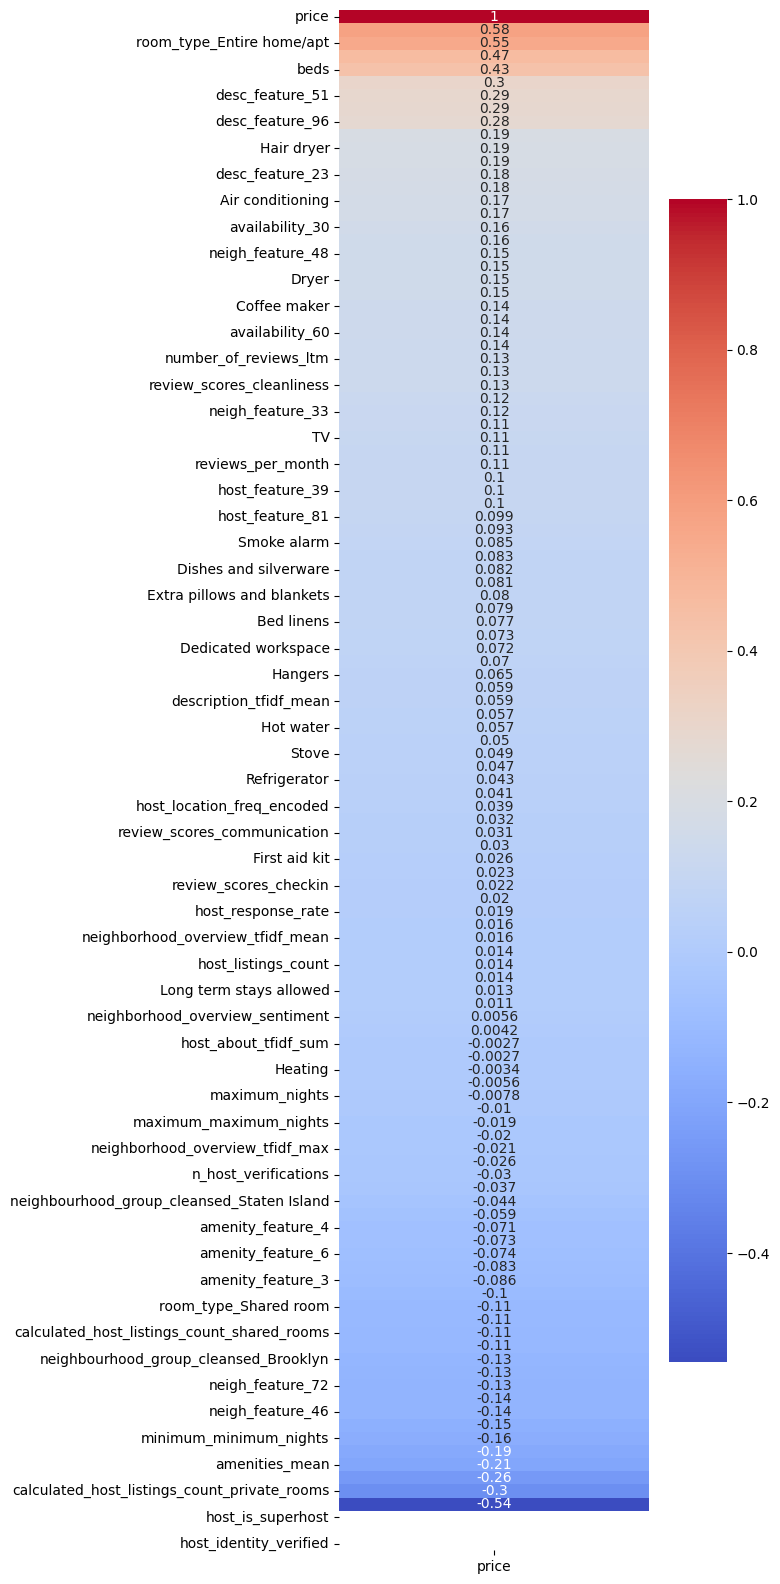

In [48]:
correlation_matrix = df.corr()
plt.figure(figsize=(5, 20))
sns.heatmap(correlation_matrix[['price']].sort_values(by='price', ascending=False), annot=True, cmap='coolwarm')
plt.show()

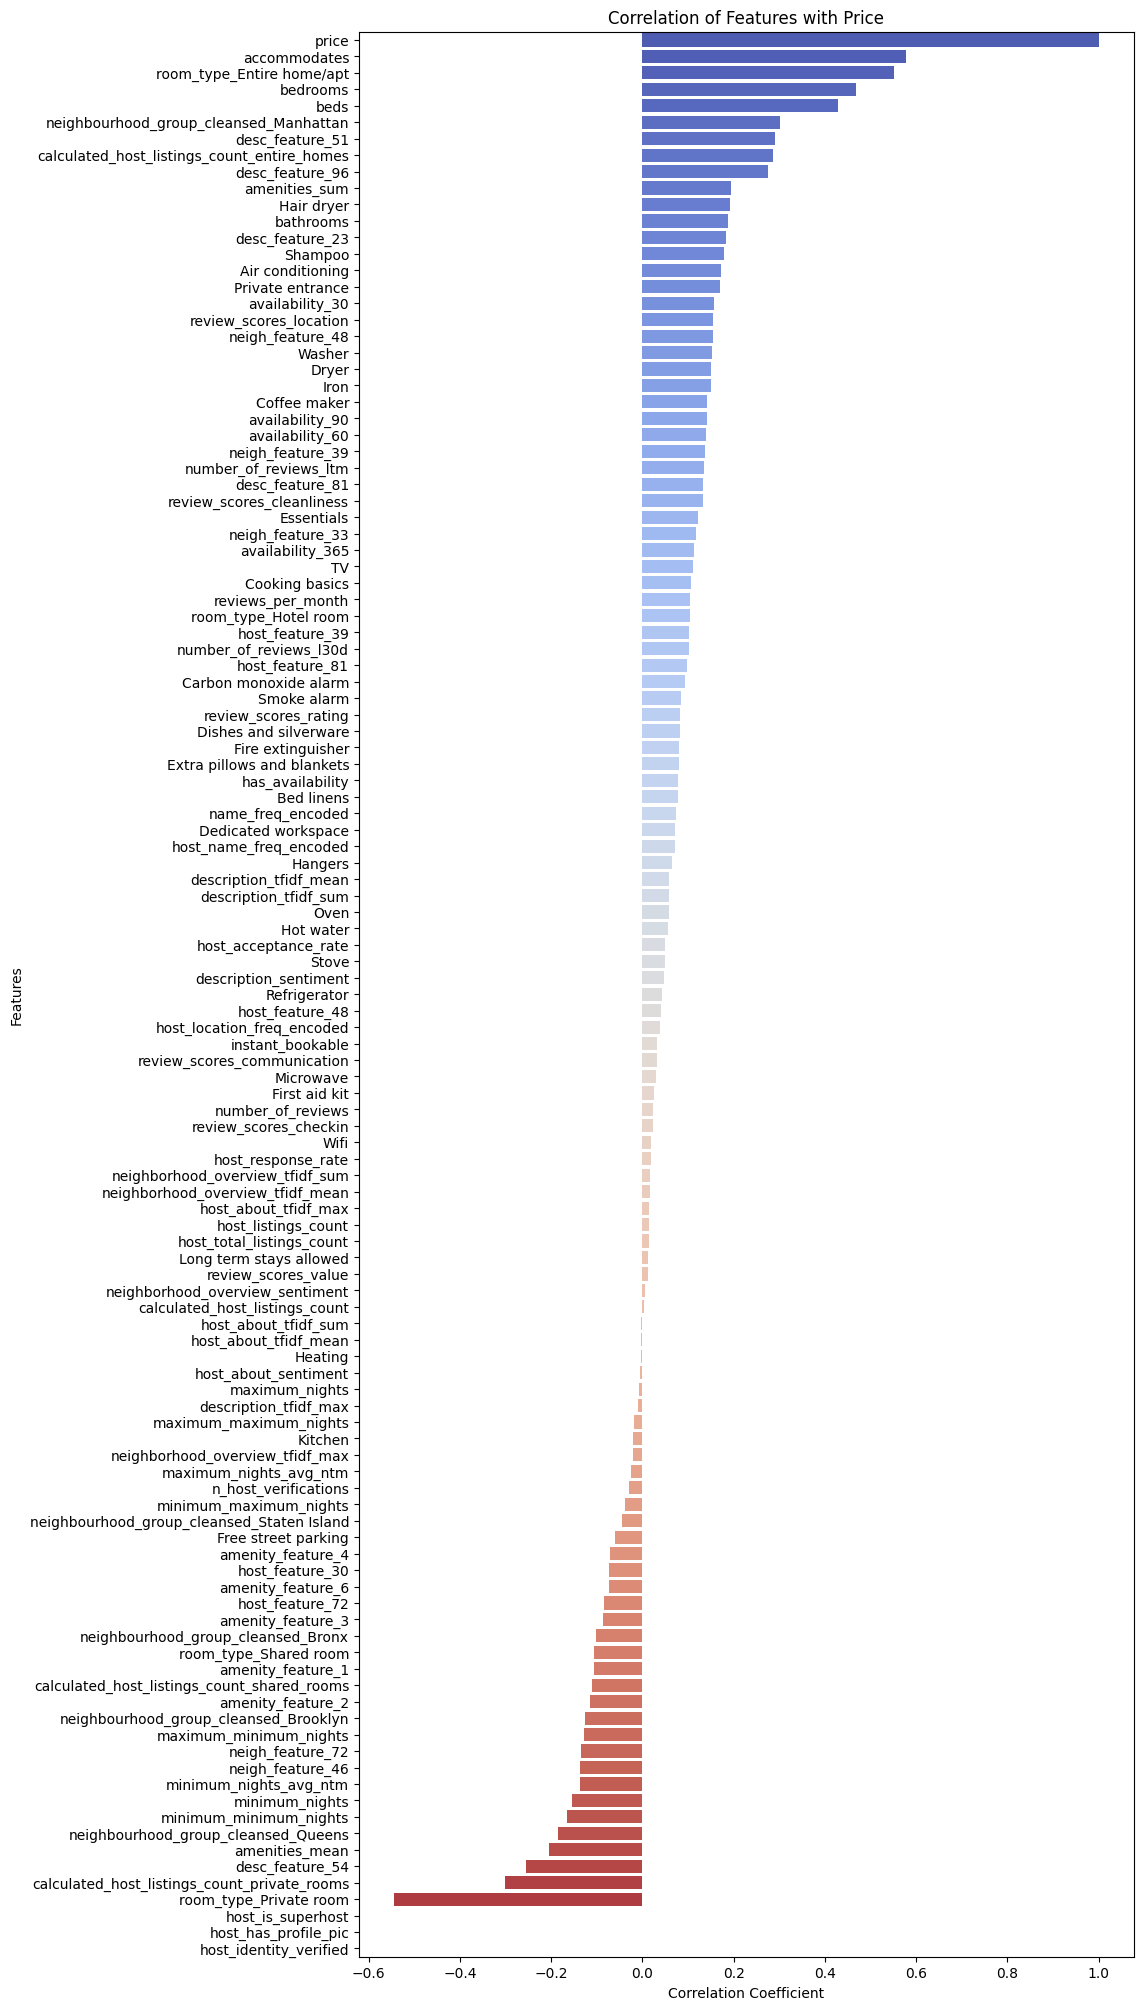

price :  1.0
accommodates :  0.57778
room_type_Entire home/apt :  0.55156
bedrooms :  0.46899
beds :  0.42853
neighbourhood_group_cleansed_Manhattan :  0.30074
desc_feature_51 :  0.28967
calculated_host_listings_count_entire_homes :  0.28568
desc_feature_96 :  0.27625
amenities_sum :  0.19499
Hair dryer :  0.19112
bathrooms :  0.18761
desc_feature_23 :  0.18234
Shampoo :  0.17847
Air conditioning :  0.17282
Private entrance :  0.1695
availability_30 :  0.15683
review_scores_location :  0.1554
neigh_feature_48 :  0.15495
Washer :  0.15287
Dryer :  0.15076
Iron :  0.15011
Coffee maker :  0.14087
availability_90 :  0.14052
availability_60 :  0.13949
neigh_feature_39 :  0.13704
number_of_reviews_ltm :  0.13417
desc_feature_81 :  0.13387
review_scores_cleanliness :  0.1324
Essentials :  0.12195
neigh_feature_33 :  0.11698
availability_365 :  0.11374
TV :  0.11079
Cooking basics :  0.10677
reviews_per_month :  0.10537
room_type_Hotel room :  0.10415
host_feature_39 :  0.10217
number_of_revie

In [49]:
corr_matrix = round(df.corr(),5)
corrs = corr_matrix['price']
corrs_sorted = corrs.sort_values(ascending = False)
plt.figure(figsize=(10, 25))
sns.barplot(x=corrs_sorted, y=corrs_sorted.index, palette='coolwarm')
plt.title('Correlation of Features with Price')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()
corrs_list = corrs_sorted.tolist()
for i in range(len(corrs_sorted)):
    print(corrs_sorted.index[i],": ", corrs_list[i])

##### Observations on Correlation Matrix (+ dropping NaN values) 

One thing I noticed about the correlation matrix is that the three boolean features 'host_is_superhost', 'host_has_profile_pic', and 'host_identity_verified' all return a NaN correlation. I was confused as to why this is, so below I inspect their value counts and get what I think is the answer: 

In [50]:
print(df['host_is_superhost'].value_counts())
print(df['host_has_profile_pic'].value_counts())
print(df['host_identity_verified'].value_counts())

1    28022
Name: host_is_superhost, dtype: int64
1    28022
Name: host_has_profile_pic, dtype: int64
1    28022
Name: host_identity_verified, dtype: int64


As can be observed, these essentially contribute nothing because they are all a matrix of True values only, and thus there is no variance. Hence, I plan to drop these:

In [51]:
df.drop(columns=['host_is_superhost', 'host_has_profile_pic',
                 'host_identity_verified'], inplace = True)

##### RandomForestRegressor Analysis 

As I did with the word vectorss and amenities frequency columns, I once again want to use the random forest regressor model to compare all the features and their correlation with 'price' and so I go through the same process and print out the top features according to the feature importances returned from the RandomForestRegressor model. 

In [52]:
X = df.drop('price', axis=1)  # features
y = df['price']  # label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs = cores)
model.fit(X_train, y_train)
feature_importances = model.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values('Importance', ascending=False)
print(importance_df.head(10))  # top 10 features

                                   Feature  Importance
42               room_type_Entire home/apt    0.304371
39  neighbourhood_group_cleansed_Manhattan    0.076569
5                                bathrooms    0.071581
93                         desc_feature_54    0.057915
4                             accommodates    0.048003
94                         desc_feature_51    0.024211
95                         desc_feature_96    0.018352
97                         desc_feature_23    0.017706
6                                 bedrooms    0.016529
28                  review_scores_location    0.016042


##### Selection of Features and Label:

After inspecting the correlation matrix and the results of the RandomForestRegressor, I saw much overlap in the first few values of the correlation matrix and RandomForestRegressor (especially for values such as if its an entire home or apartment, if there are beds, or bathrooms, what the reviews of the location are, etc.). All of those make sense to be at the top. However, there were still yet some confusing ones that might lessen the interpretability of the results (such as the different pieces of the description/word vectors... I did see an interesting pattern though with these being a bit more correlated with price). Either way, I just chose the first 35 features as a starting point for training the models with my code below:

In [53]:
top_features = corrs_sorted.index[1:36] # skipping the first, to skip price
features = top_features
label = 'price' 

X = df[features]
y = df[label]

# this is to just check:
print(X.shape)
print(y.shape)

(28022, 35)
(28022,)


## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data.

----------------------------------------------------------------------------------------
- I do have a new feature list, and I mainly kept the features that seemed most relevant according to the correlation matrix and a RandomForestRegressor's feature importances ranking. I believe some of these features are explainable as well (I speak more in depth about it above)
- I used a variety of preparation techniques (as mentioned above), from winsorization, MinMax scaling, boolean conversion, one-hot-encoding, frequency encoding, dealing with NaN, and various NLP techniques to deal with the string data and get the most I can out of it
- I primarily plan to train one optimized RandomForestRegressor model as of now, due to the time constraints. However, I do plan to optimize this model as much as possible (by tuning hyperparameters) to lessen the RMSE and increase the R^2 score. 
----------------------------------------------------------------------------------------

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [1]:
# Note: here, I'm importing the packages I use to actually train the model 
# all the data prep packages were imported in the stage above (I just feel more organized that way)

# I already imported RandomForestRegressor above (but I'll still be using it here
from sklearn.metrics import mean_squared_error, r2_score

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

---------------------------------------------------------------------------------------
<b>Note: </b> I did all my data prep in the part above (just so it doesn't feel even more cluttered than it already is, and so I could differentiate between the two stages easier)

----------------------------------------------------------------------------------------

#### Splitting Into Training and Testing

First, I'll split the selected features above into training and testing sets. I want to set aside 80% for training (that just seems like a good amount to me, and many of the examples done in the past follow that), and 20% for testing. I also add a random state so I can get results I can reproduce each time I run this code. 

In [55]:
# 80% goes to training, 20% to testing:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Training RandomForestRegressor 

Again, I believe that the RandomForestRegressor might be best for this task since it's an ensemble model that combines the power of many individual decision trees, without the risk of overfitting as well. Thus, I wanted to train an optimal RandomForestRegressor model. There are two things that stuck out to me to optimize: one is the n_estimators parameter (the amount of individual decision trees), and the other is the max depth of the individual trees. I believe I remember from a previous lesson that these are the most important hyperparameters to consider when dealing with a RandomForestRegressor, and thus I want to optimize and pick out the best hyperparameter for each to train one final model. 

##### Optimizing N-Estimators 

The way I will go about doing this is similar to how I typically go about these tasks in prior assignments: I loop through a list of possible values, evaluate metrics on each one, store them in a dictionary, and at the end I compare them to pick the best one. My code goes more in detail with comments explaining my thought process. (I also realize there's an annoying warning that keeps popping up regarding the mean_squared_error function, but I believe for now this should be fine). I also change the way I pick the best hyperparameter by this time focusing on minimizing the LOSS (or minimizing RMSE).

In [56]:
n_estimators_grid = [100, 200, 300, 400, 500] #amt of estimators I want to test
default_max_depth = None  # keeping max_depth default 

results_n_estimators = {} # this is a dictionary to store the results I get
# its going to be a dictionary of dictionaries 
# where each individual dictionary contains the rmse and r^2 value

for n_estimators in n_estimators_grid: # I go through each estimator
   
    print(f"Testing n_estimators = {n_estimators}")

    # initializing and fitting model: 
    rf_model = RandomForestRegressor(n_estimators=n_estimators, max_depth=default_max_depth, random_state=42, n_jobs=cores)
    rf_model.fit(X_train, y_train)

    y_rf_pred = rf_model.predict(X_test) # making predictions

    # finally calculating the metrics and evaluating the model:
    rf_rmse = mean_squared_error(y_test, y_rf_pred, squared=False)
    rf_r2 = r2_score(y_test, y_rf_pred)

    # I then store the results in the dictionary I created earlier
    results_n_estimators[n_estimators] = {'rmse': rf_rmse, 'r2': rf_r2}
    print(f"RMSE: {rf_rmse}, R2: {rf_r2}\n")

# This time, I try to pick the best estimator as the one that has 
# the least mean squared error:
best_n_estimators = min(results_n_estimators, key=lambda x: results_n_estimators[x]['rmse'])

# ^this basically takes the dictionary, and then goes through each value in 
# results_n_estimators, specifically picking out the rmse and
# finding the min value 

print(f"Best n_estimators: {best_n_estimators}")

Testing n_estimators = 100


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RMSE: 0.11079560420948902, R2: 0.703593399509197

Testing n_estimators = 200


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RMSE: 0.11043535357340681, R2: 0.7055177911684244

Testing n_estimators = 300


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RMSE: 0.1103141772253816, R2: 0.7061636839916265

Testing n_estimators = 400


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RMSE: 0.11033476931344316, R2: 0.706053974284635

Testing n_estimators = 500
RMSE: 0.1102091339066551, R2: 0.7067230109464266

Best n_estimators: 500


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


##### Observations on N-Estimators

As expecting, the best performing hyperparameter was the highest number of estimators. Since random forests are known to not overfit with the more estimators you have, it makes sense that 500 led to still yet better performance (even if only marginally higher). 

<br>

##### Optimizing Max Depth 

In a similar fashion, I go through 5 different plausible values for the max depth and pick the best one:

In [59]:
# similar procedure for max depth :
max_depth_grid = [10, 20, 30, 40, 50]

default_n_estimators = best_n_estimators  
# ^ I use the best n_estimators found from the prev. experiment as the default here 

results_max_depth = {} 

for max_depth in max_depth_grid:
    print(f"Testing max_depth = {max_depth}")

    rf_model = RandomForestRegressor(n_estimators=default_n_estimators, max_depth=max_depth, random_state=42, n_jobs=cores)
    rf_model.fit(X_train, y_train)

    y_rf_pred = rf_model.predict(X_test)

    rf_rmse = mean_squared_error(y_test, y_rf_pred, squared=False)
    rf_r2 = r2_score(y_test, y_rf_pred)

    results_max_depth[max_depth] = {'rmse': rf_rmse, 'r2': rf_r2}
    print(f"RMSE: {rf_rmse}, R2: {rf_r2}\n")

# Again, I find the best max depth in a similar fashion using the key for comparison
best_max_depth = min(results_max_depth, key=lambda x: results_max_depth[x]['rmse'])
print(f"Best max_depth: {best_max_depth}")


Testing max_depth = 10


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RMSE: 0.11341320153452489, R2: 0.6894224707862112

Testing max_depth = 20


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RMSE: 0.11026948229088858, R2: 0.7064017374266661

Testing max_depth = 30


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RMSE: 0.11025672207949574, R2: 0.7064696829552894

Testing max_depth = 40


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RMSE: 0.11021082447389774, R2: 0.706714013356919

Testing max_depth = 50
RMSE: 0.1102091339066551, R2: 0.7067230109464266

Best max_depth: 50


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


##### Observations on Max Depth

I do notice that there isn't much of a difference when there's depths like 50 or 40 (the only leap I saw in max depth was from 10 to 20). Again, I suppose this makes sense since random forest models don't tend to overfit as much (since it's an ensemble model built off of the individual decision trees)

In [60]:
# training a model on the best hyperparameters found:
final_rf_model = RandomForestRegressor(n_estimators=best_n_estimators, max_depth=best_max_depth, random_state=42, n_jobs=cores)
final_rf_model.fit(X_train, y_train)

# finally, evaluating the final model:
y_final_rf_pred = final_rf_model.predict(X_test)
final_rf_rmse = mean_squared_error(y_test, y_final_rf_pred, squared=False)
final_rf_r2 = r2_score(y_test, y_final_rf_pred)

print(f"Final Model - RMSE: {final_rf_rmse}, R2: {final_rf_r2}")

Final Model - RMSE: 0.1102091339066551, R2: 0.7067230109464266


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Final Observations, Remarks, and Future Plans

Overall, I think I did the best I could with the raw data given in the Airbnb training set. I think an RMSE of 0.110 is as low as I could get the final model to be, as well as getting the highest value of R2 to be 70%. In fact, I did take a look at the Comparing Regressors Jupyter Notebook assignment we did in this course, and I was pleasantly surprised that the RMSE was lower and the R2 was higher for my model, compared to any of the models trained in that one. However, unfortunately due to the corruption of my Jupyter Notebook mid-week, I wasn't able to fully carry out some other ideas I had in mind until I got the Notebook running again (and even then, a lot of my progress and work was lost, so I had to build up some of it from the ground up again). I did get to do mostly everything I wanted with the Data Prep (which took a good majority of the week to learn, review, and apply), however, I do wish I was able to do more for the training of the model. I did intially wished to also train a Gradient Boosted Decision Tree ensemble model, as well as a Neural network for this problem, and then compare between the RandomForestRegressor, Gradient Boosted Decision Tree, and Neural Network to see which the best performer was, and if different combinations would result in better outcomes. However, due to the time constraints, I believe I am pretty satisfied with this result.  